In [123]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')

In [124]:
train=pd.read_csv("~/Downloads/train_LZdllcl.csv.xls")

In [125]:
test=pd.read_csv("~/Downloads/test_2umaH9m.csv.xls")

In [126]:
train.shape,test.shape

((54808, 14), (23490, 13))

In [127]:
train.is_promoted.unique()

array([0, 1])

In [128]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [129]:
combine=pd.concat([train,test],ignore_index=False,sort=False)

In [130]:
combine

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


In [131]:
combine.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [132]:
combine.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
dtype: object

In [133]:
combine.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [134]:
combine.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [135]:
combine.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [136]:
# EDA 


In [137]:
combine.select_dtypes(include=np.number).columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

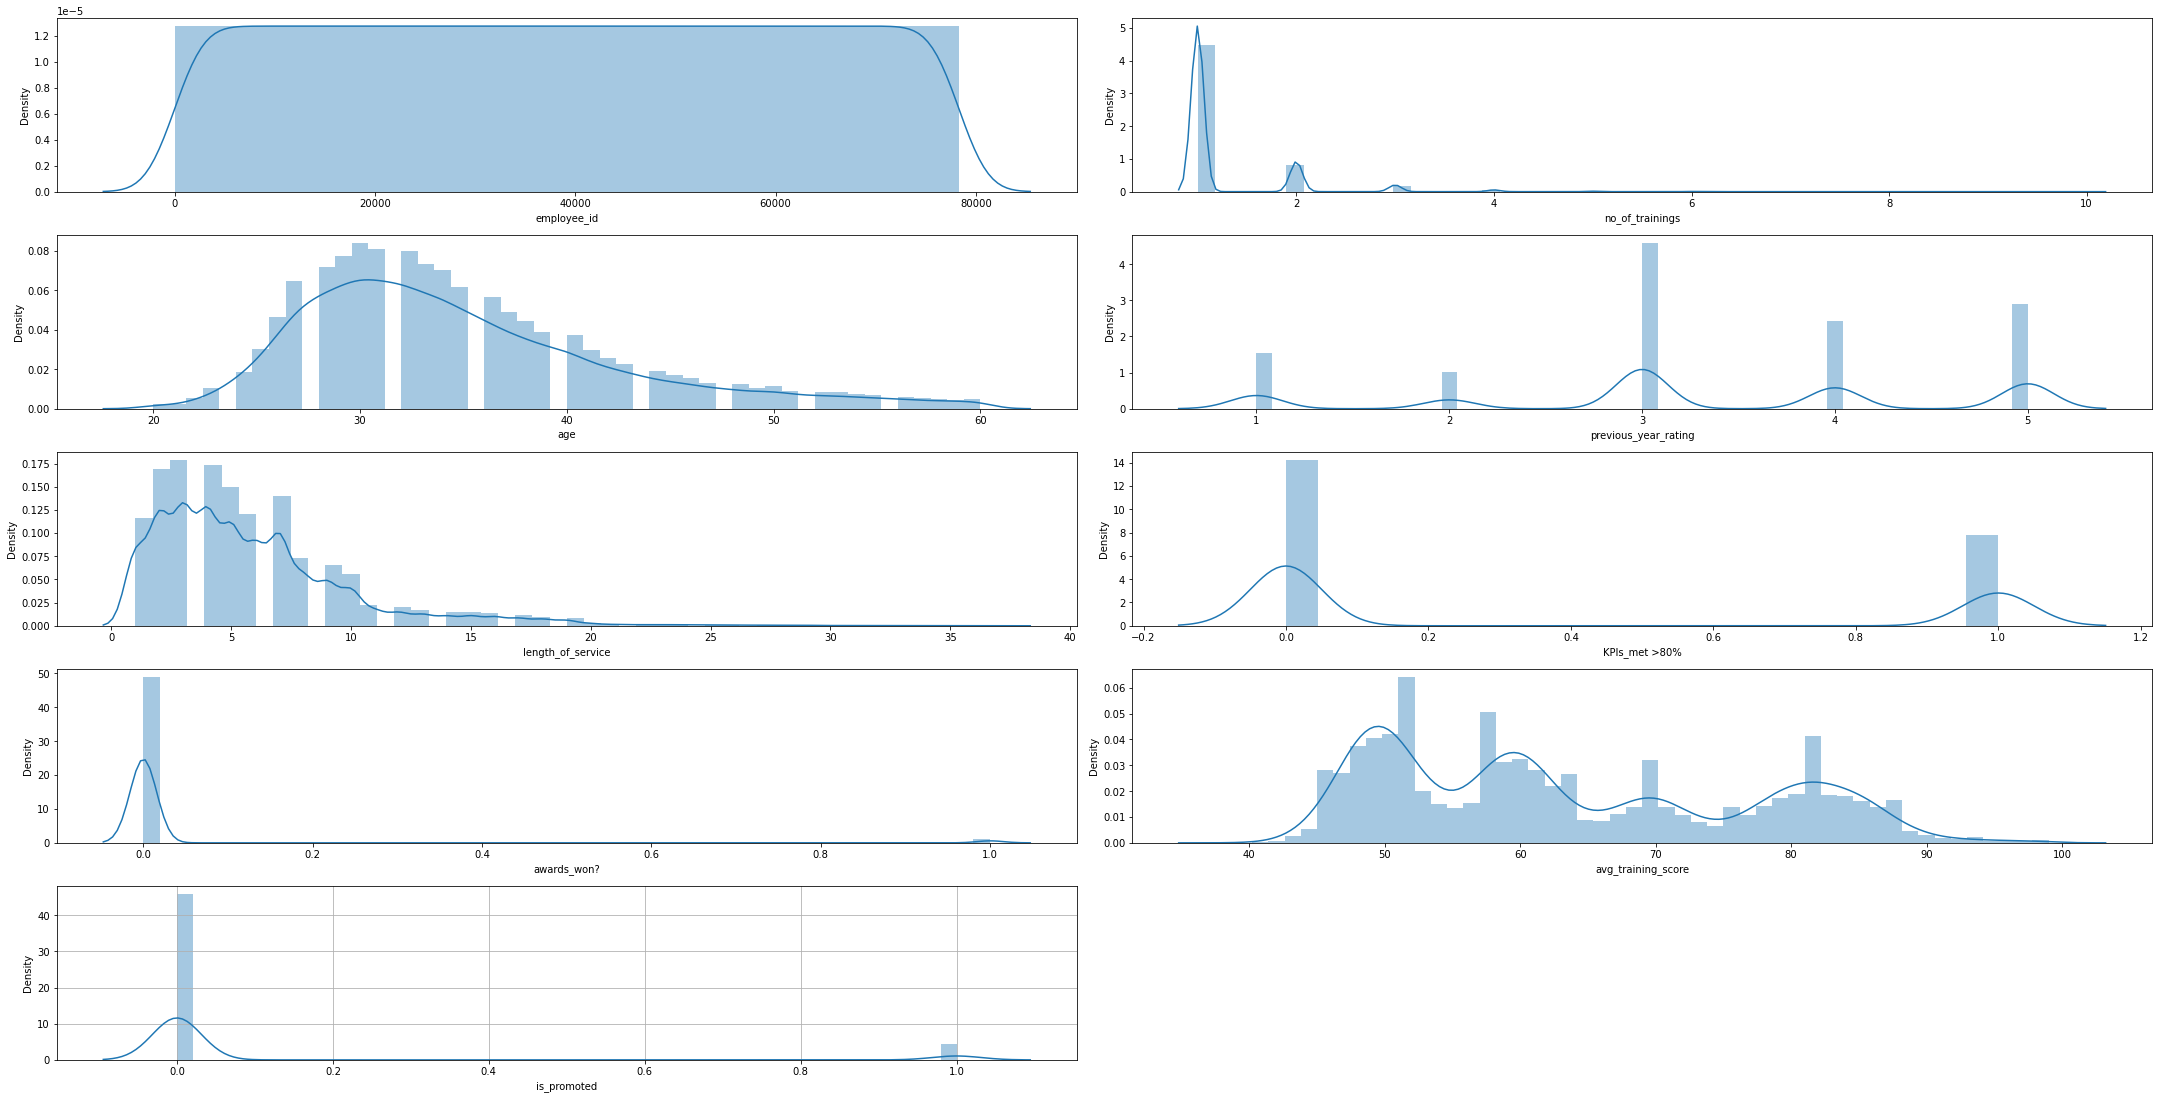

In [138]:
num=['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
      'avg_training_score', 'is_promoted']
plt.rcParams['figure.figsize']=[30,30]
col=2
rows=10
counter=1
for i in num:
    plt.subplot(rows,col,counter)
    sns.distplot(combine.loc[:,i])
    counter+=1
    
    
plt.tight_layout()
plt.grid(True)
plt.show()



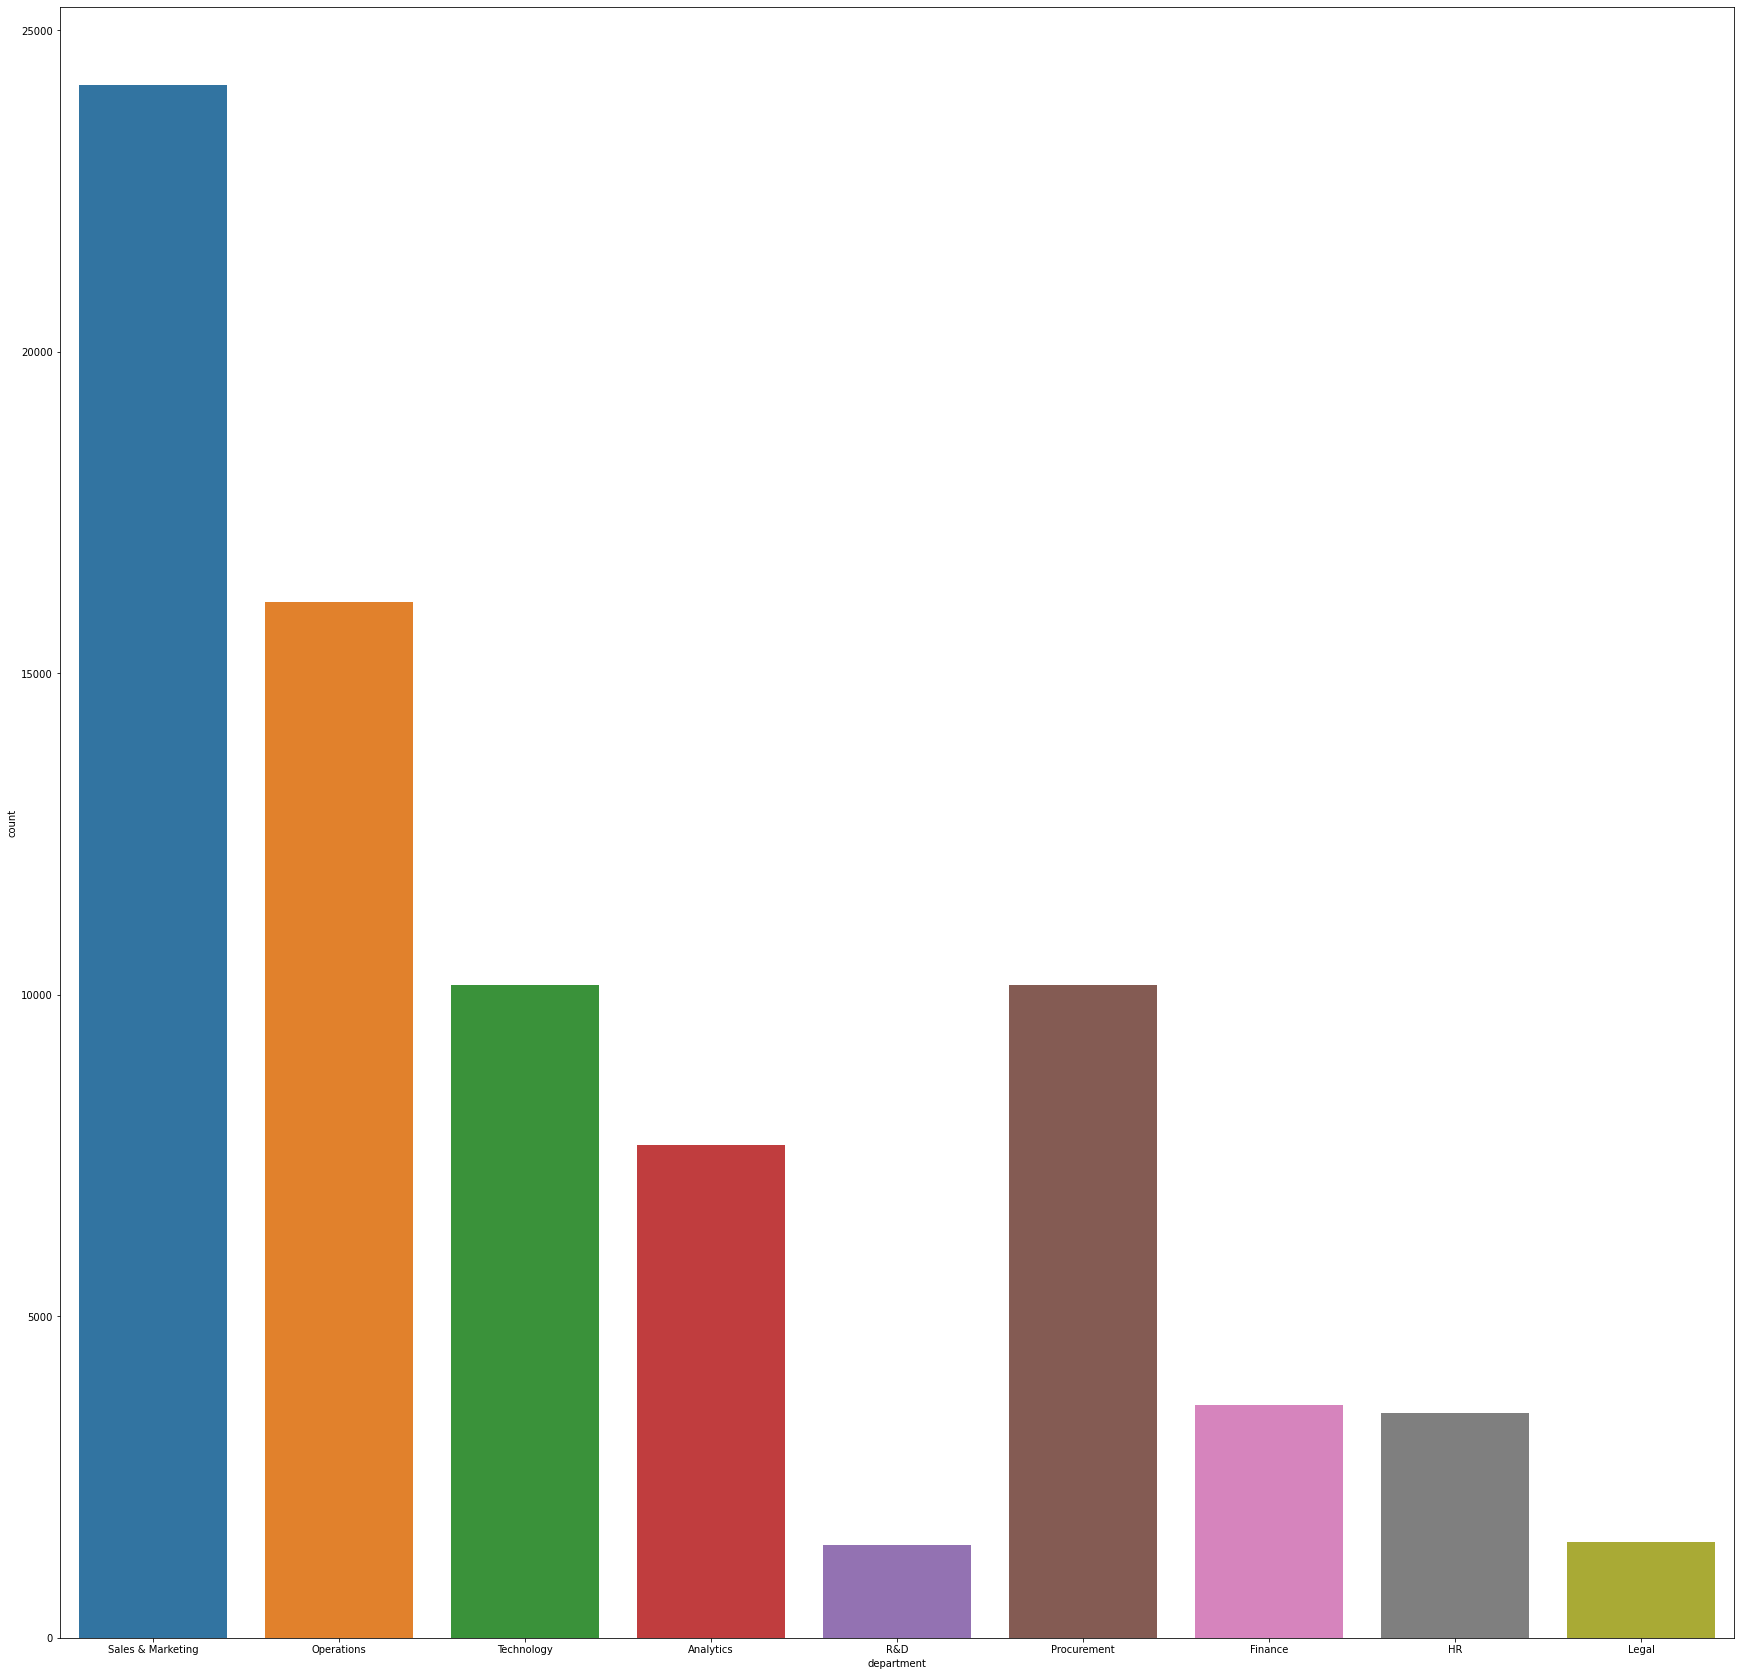

In [139]:
sns.countplot(combine.department)
plt.show()

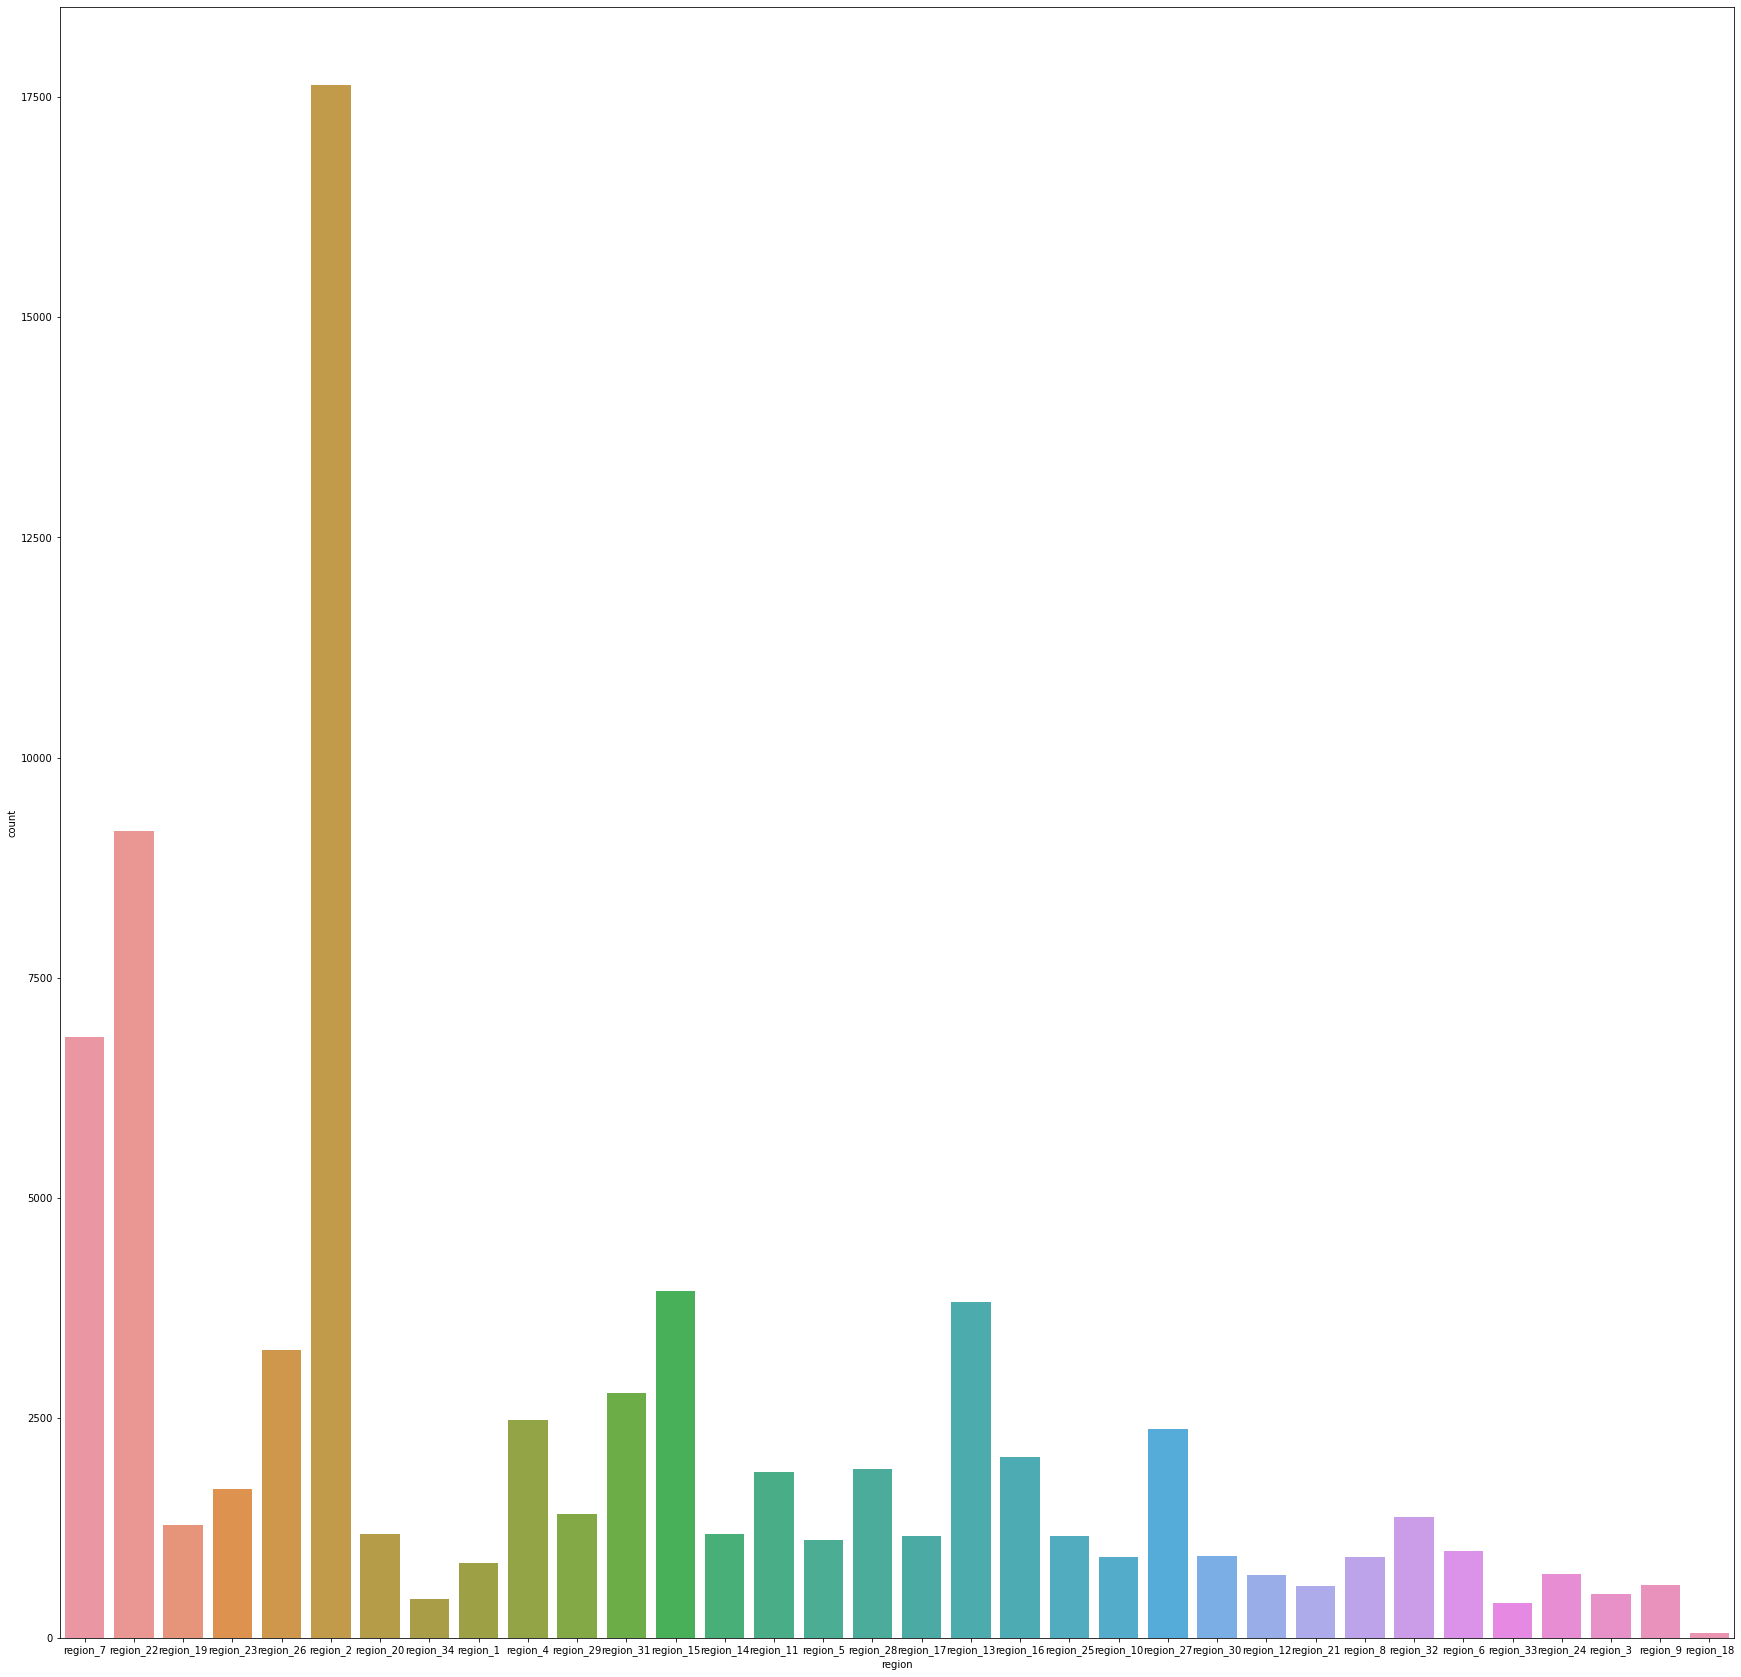

In [140]:
sns.countplot(combine.region)
plt.show()

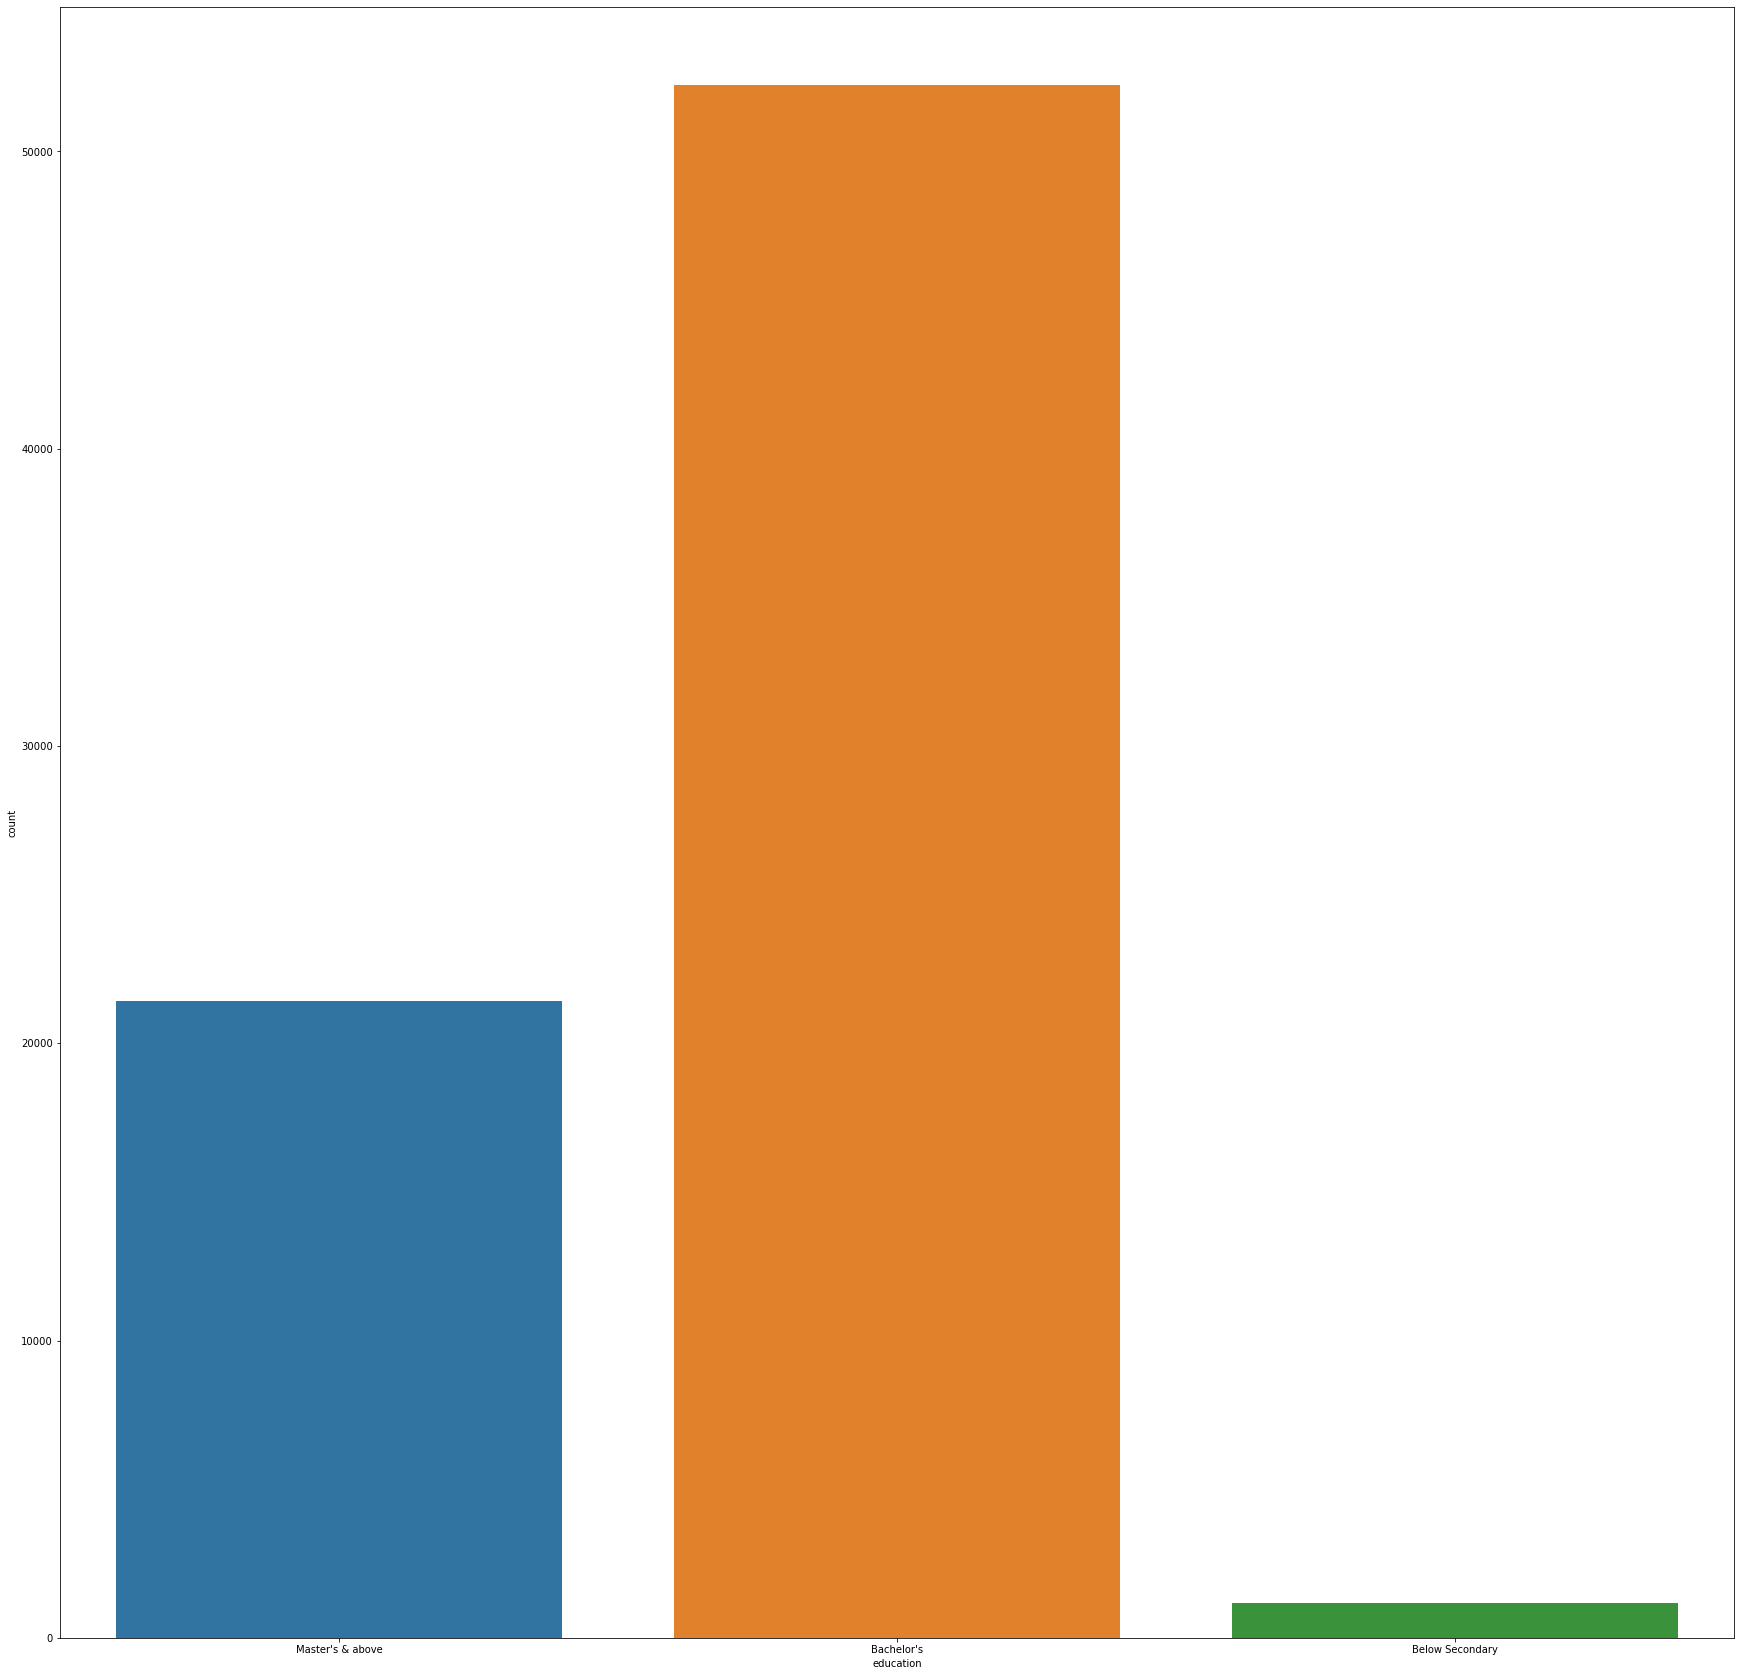

In [141]:
sns.countplot(combine.education)
plt.show()

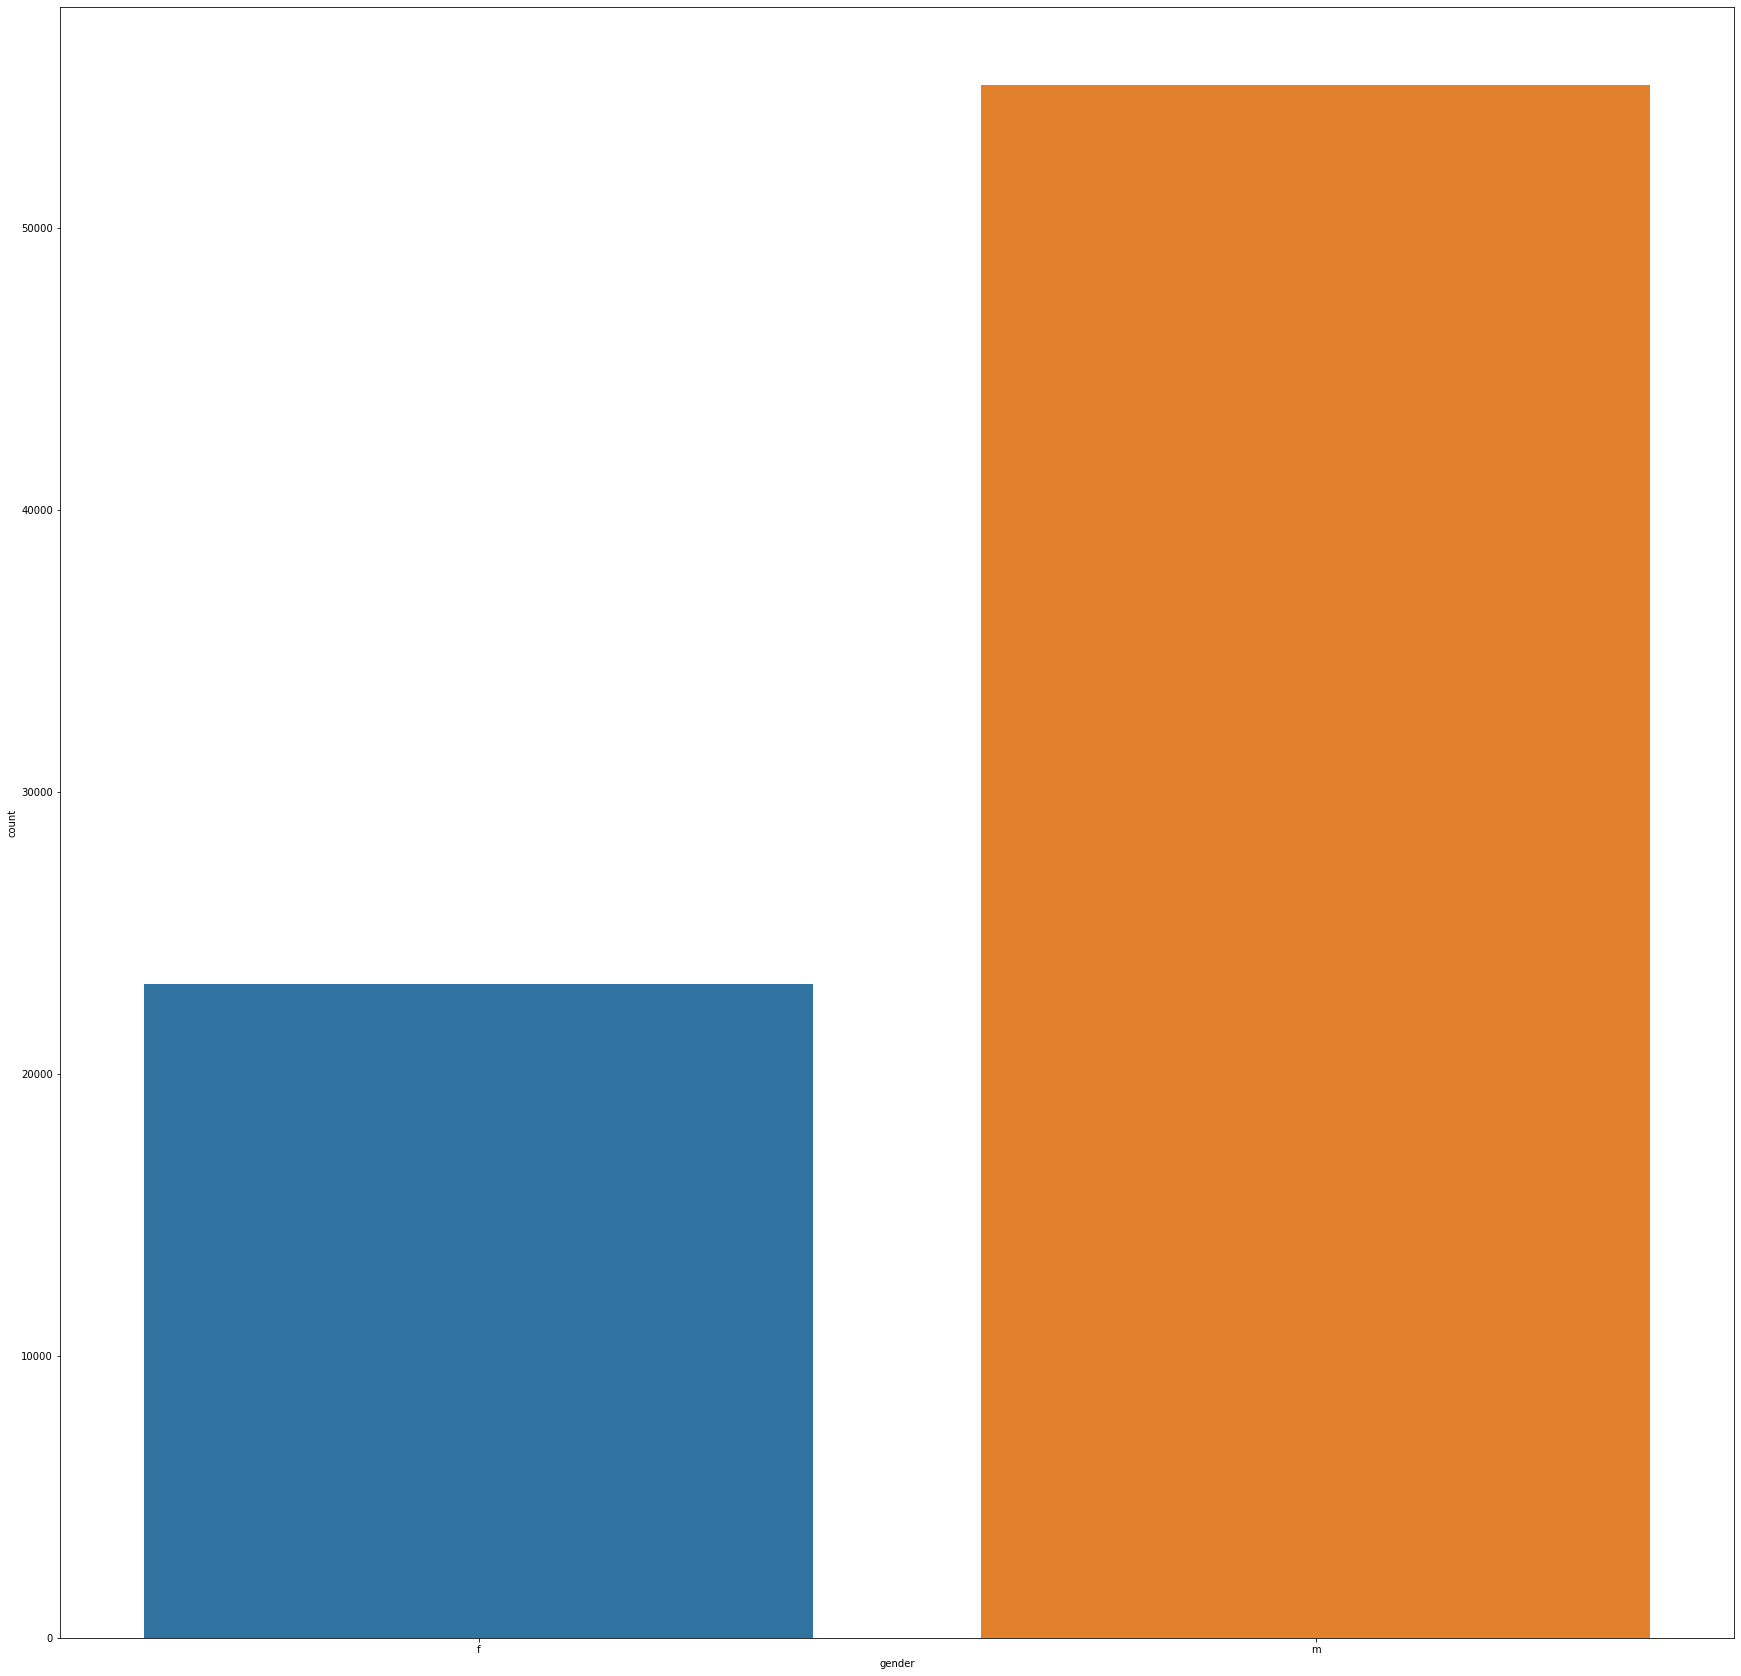

In [142]:
sns.countplot(combine.gender)
plt.show()

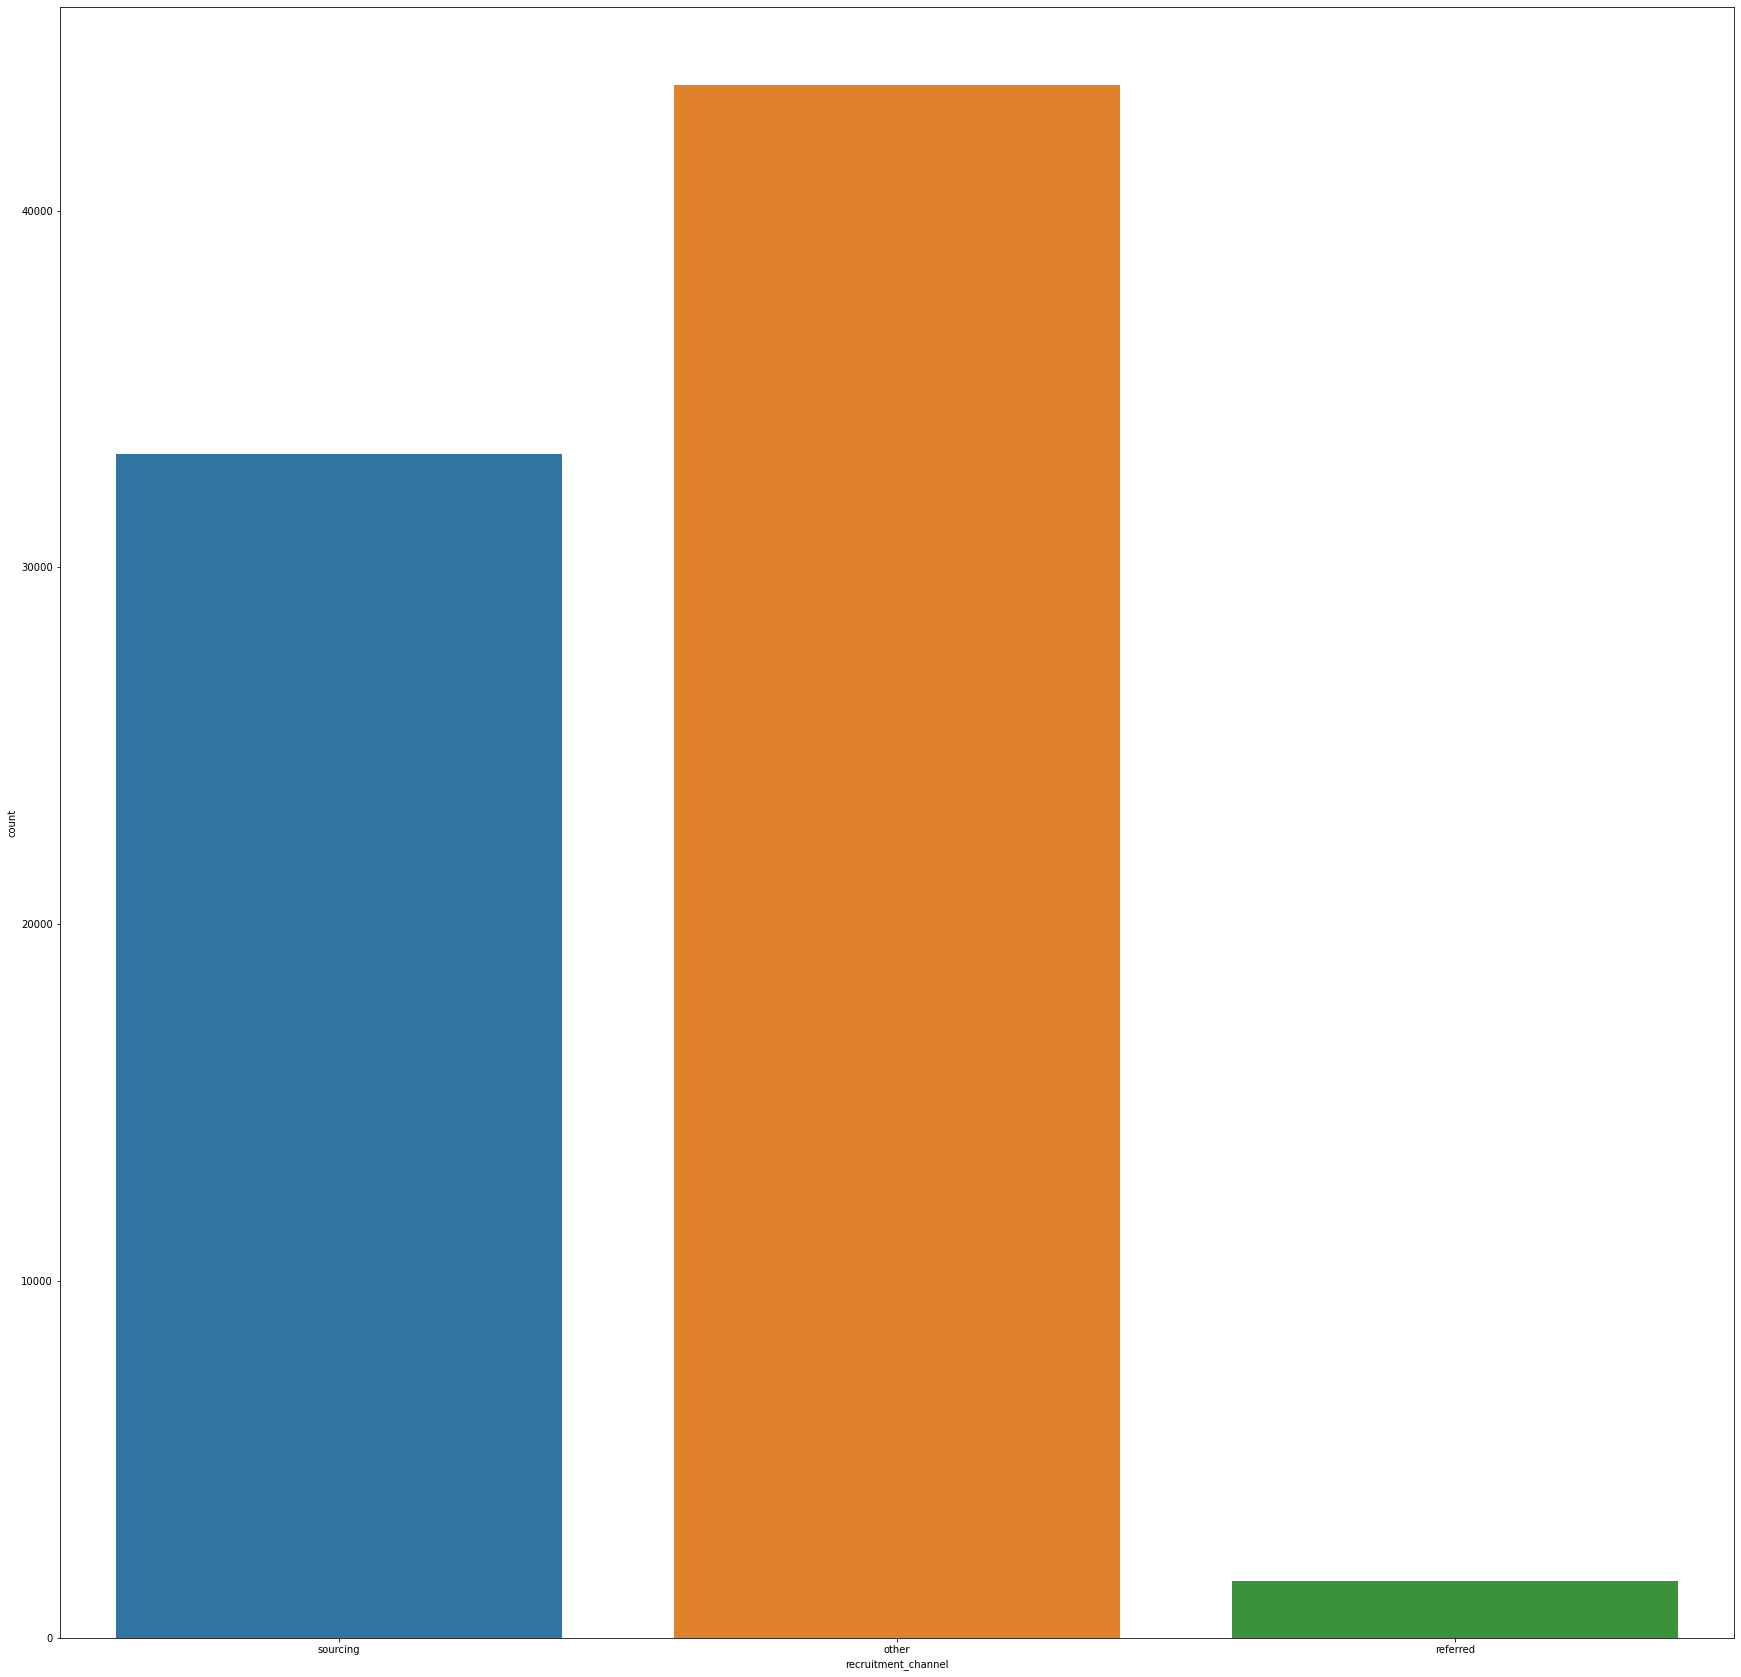

In [143]:
sns.countplot(combine.recruitment_channel)
plt.show()

# Bivariate Anayalis 

In [144]:
combine.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [145]:
# we will plot bar via cross tabulation to check the two attributes 
# department vs is promoted

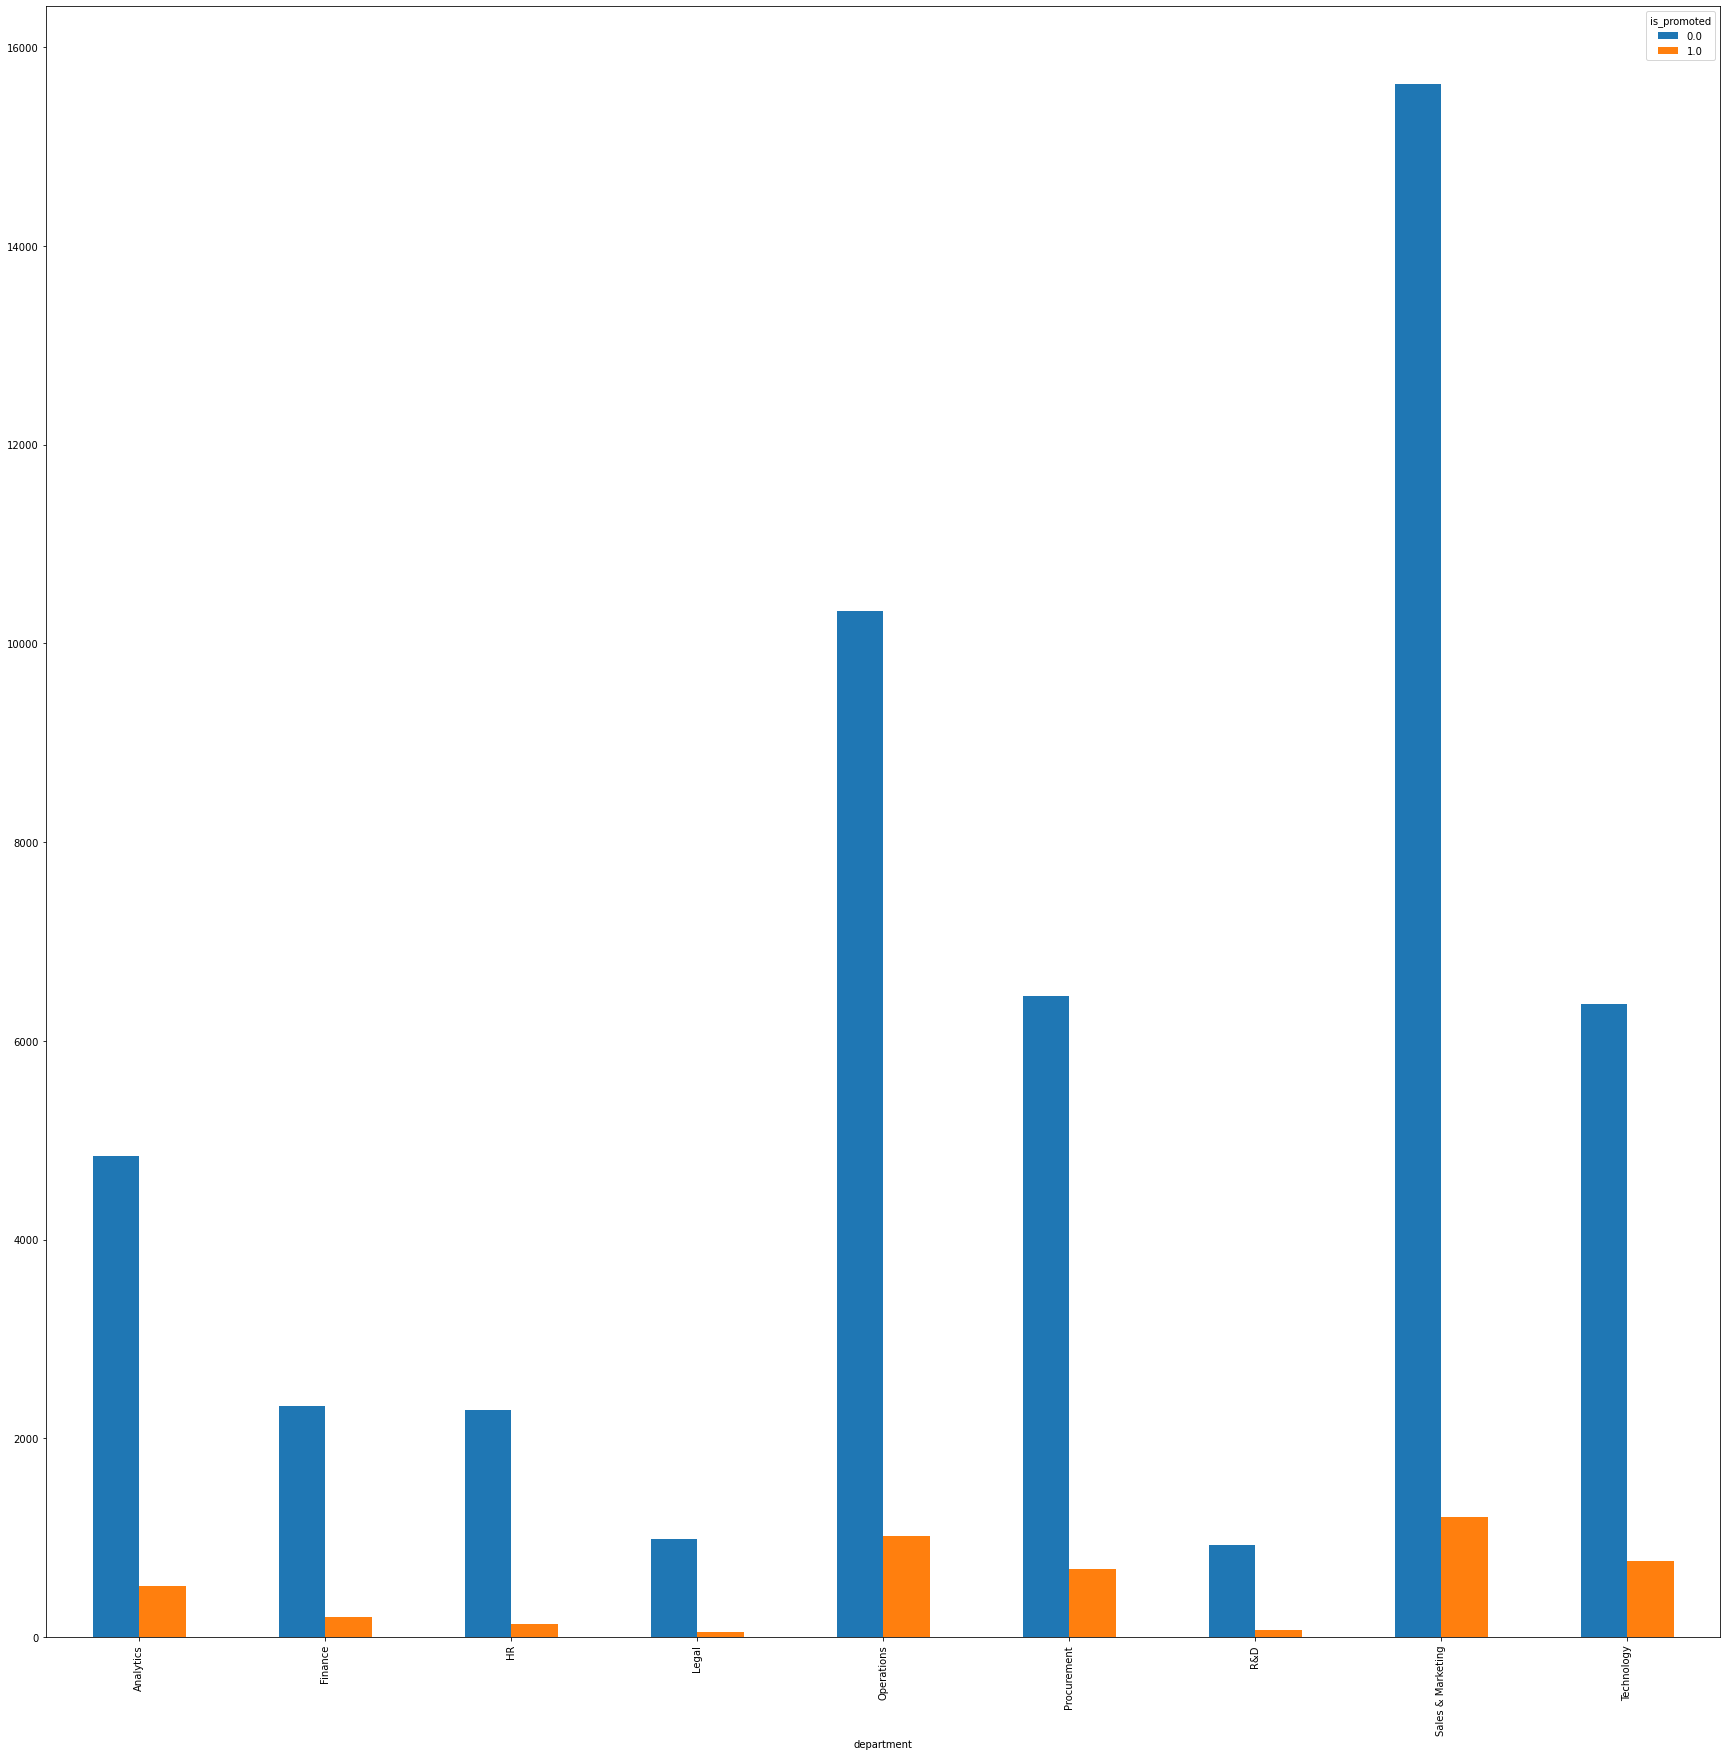

In [146]:
pd.crosstab(combine.department,combine.is_promoted).plot(kind='bar')
plt.show()

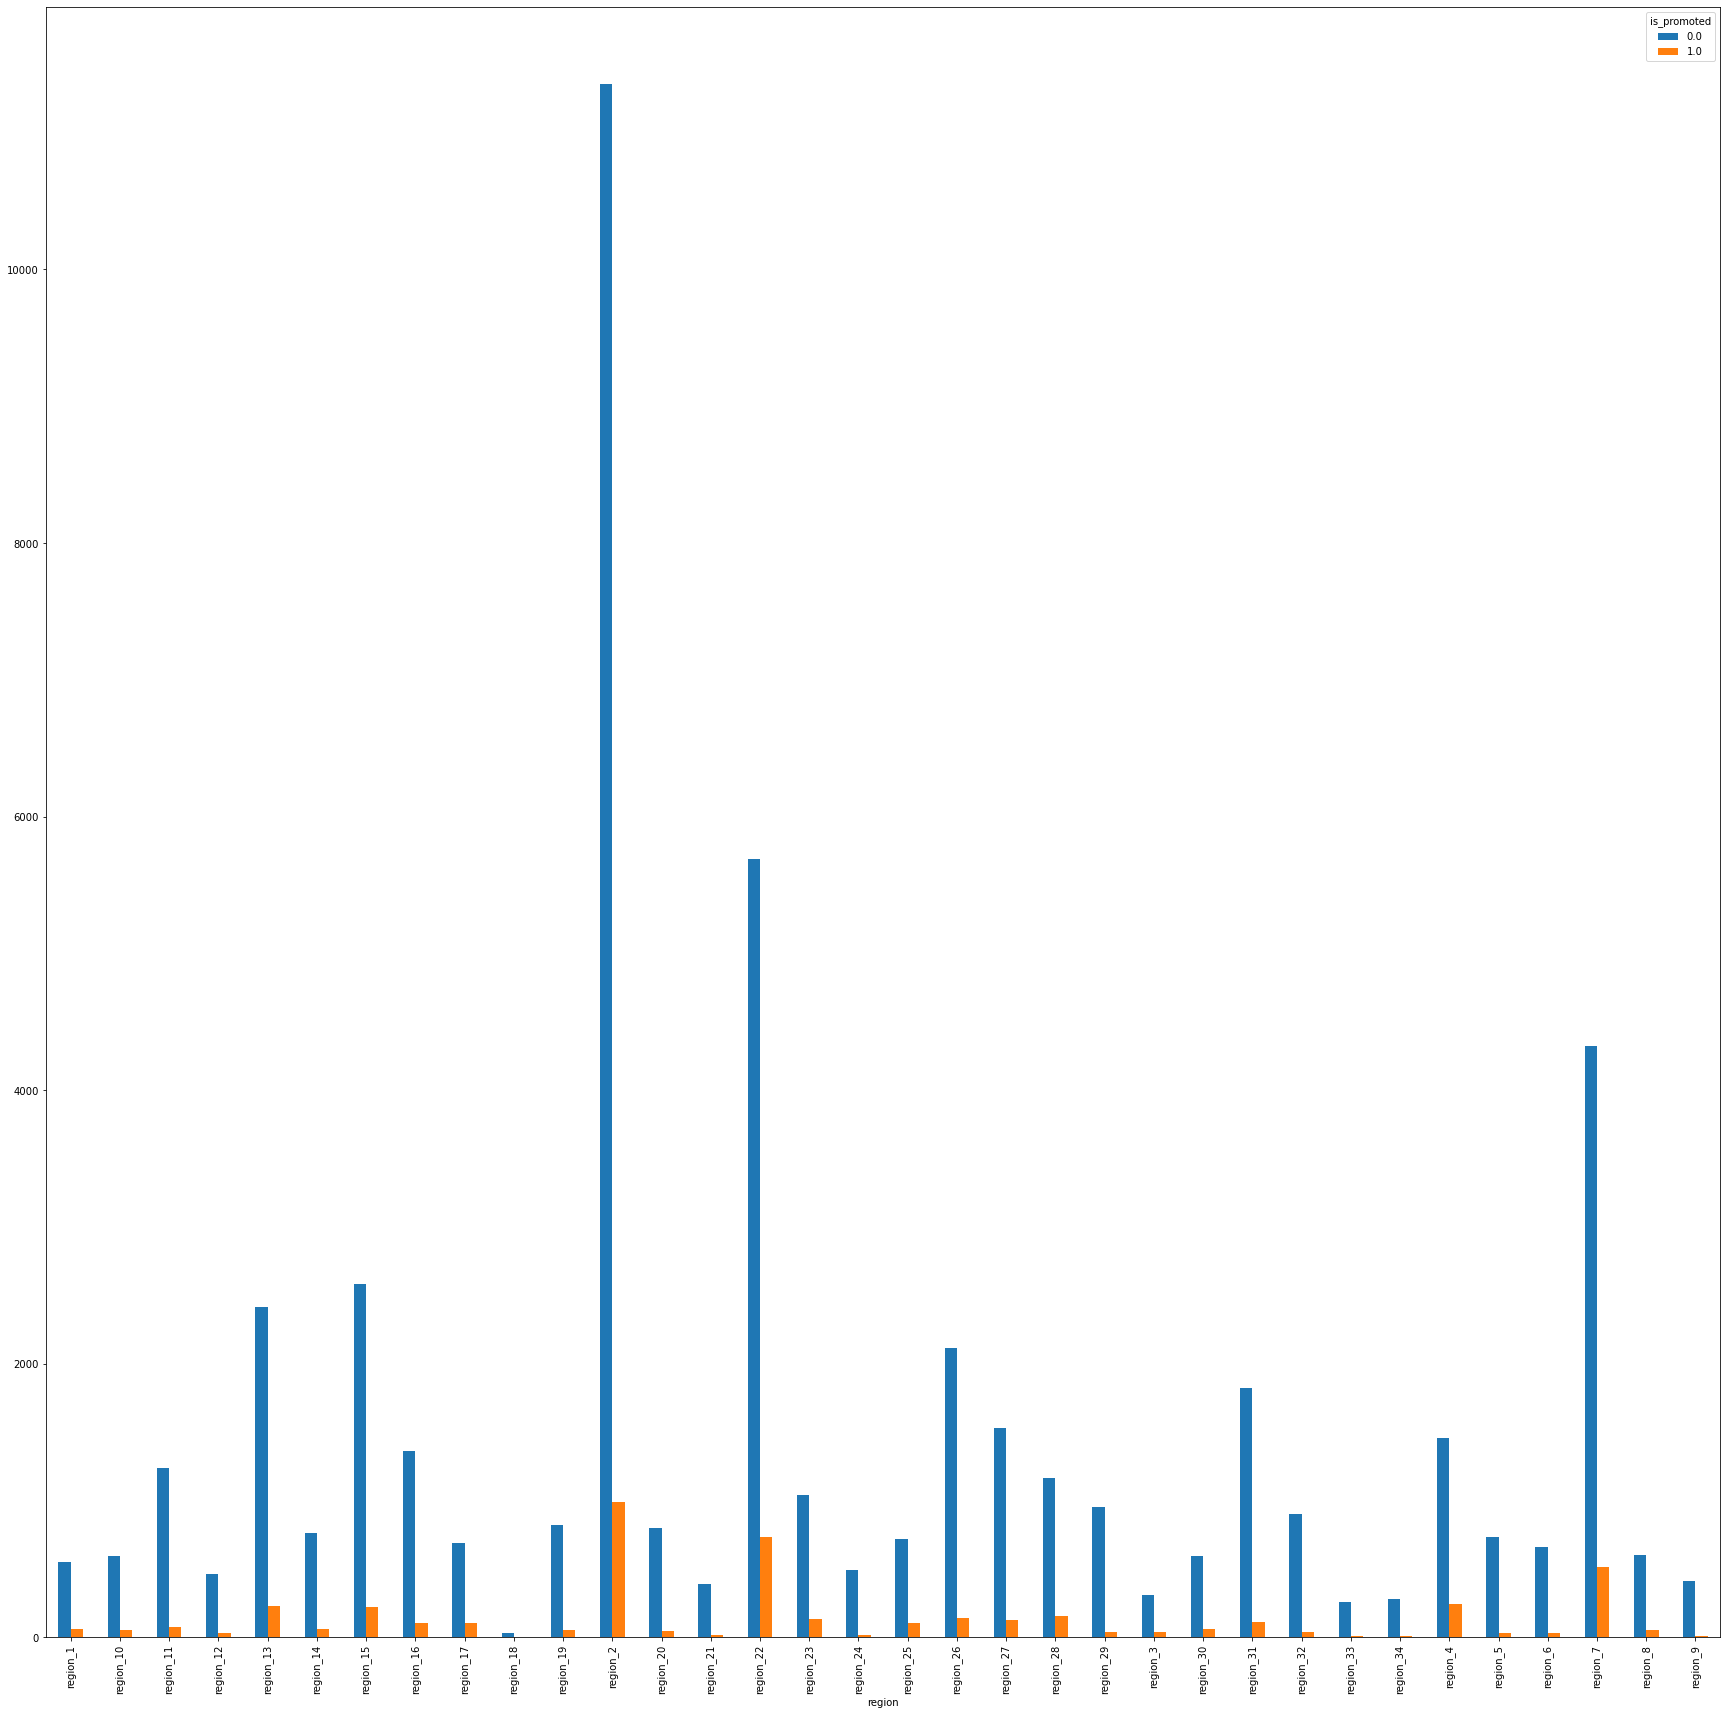

In [147]:
pd.crosstab(combine.region,combine.is_promoted).plot(kind='bar')
plt.show()

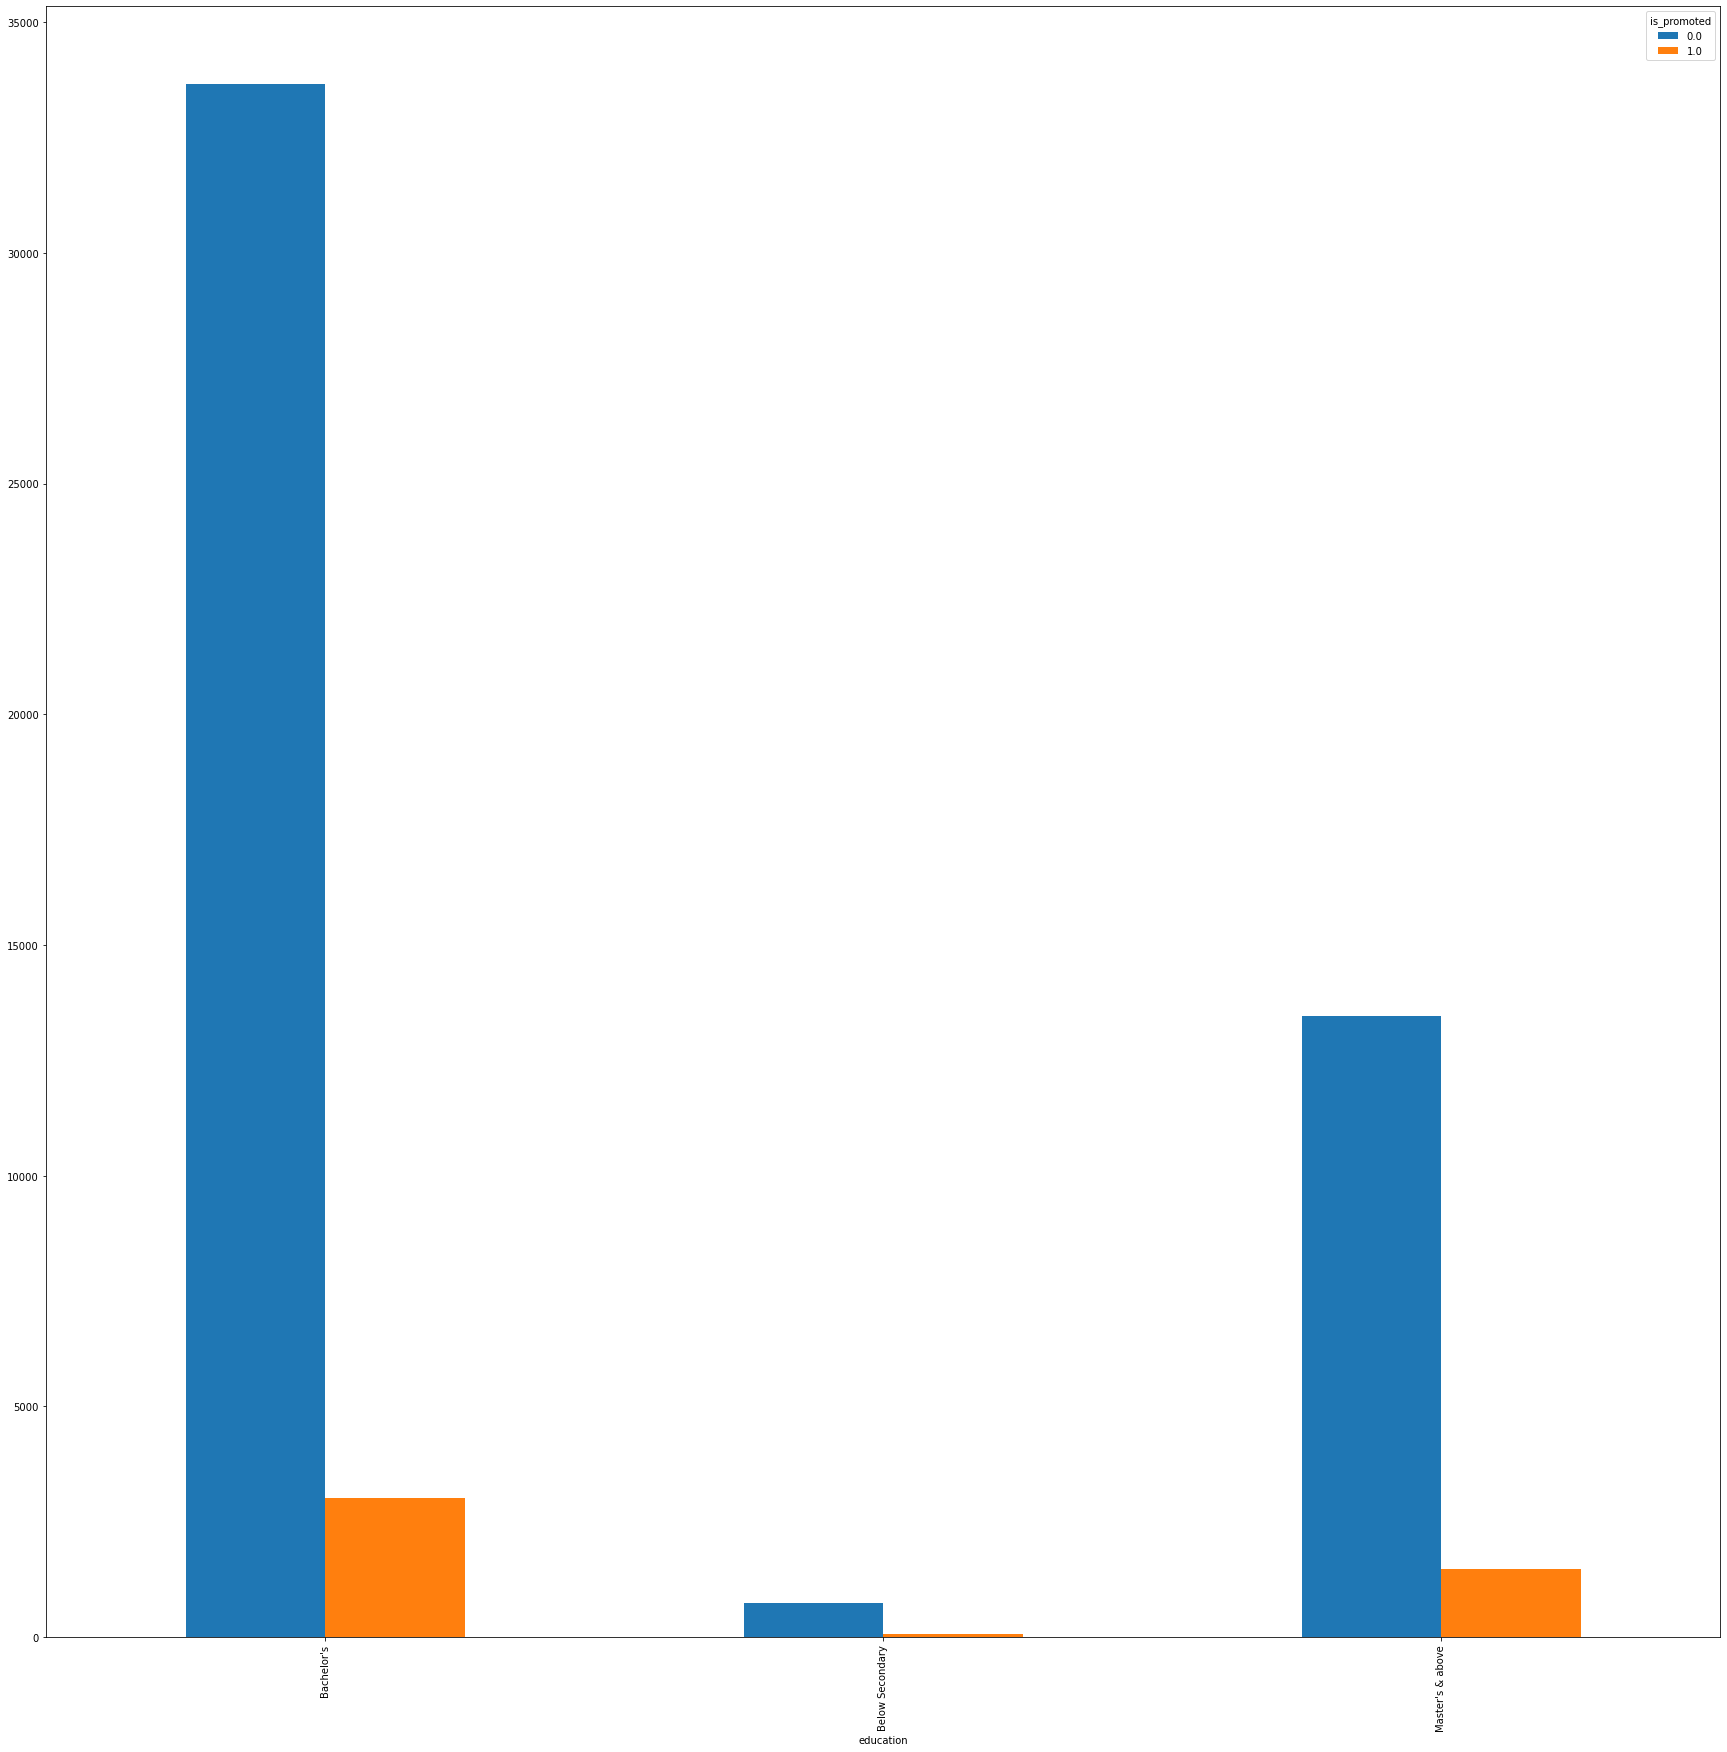

In [148]:
pd.crosstab(combine.education,combine.is_promoted).plot(kind='bar')
plt.show()

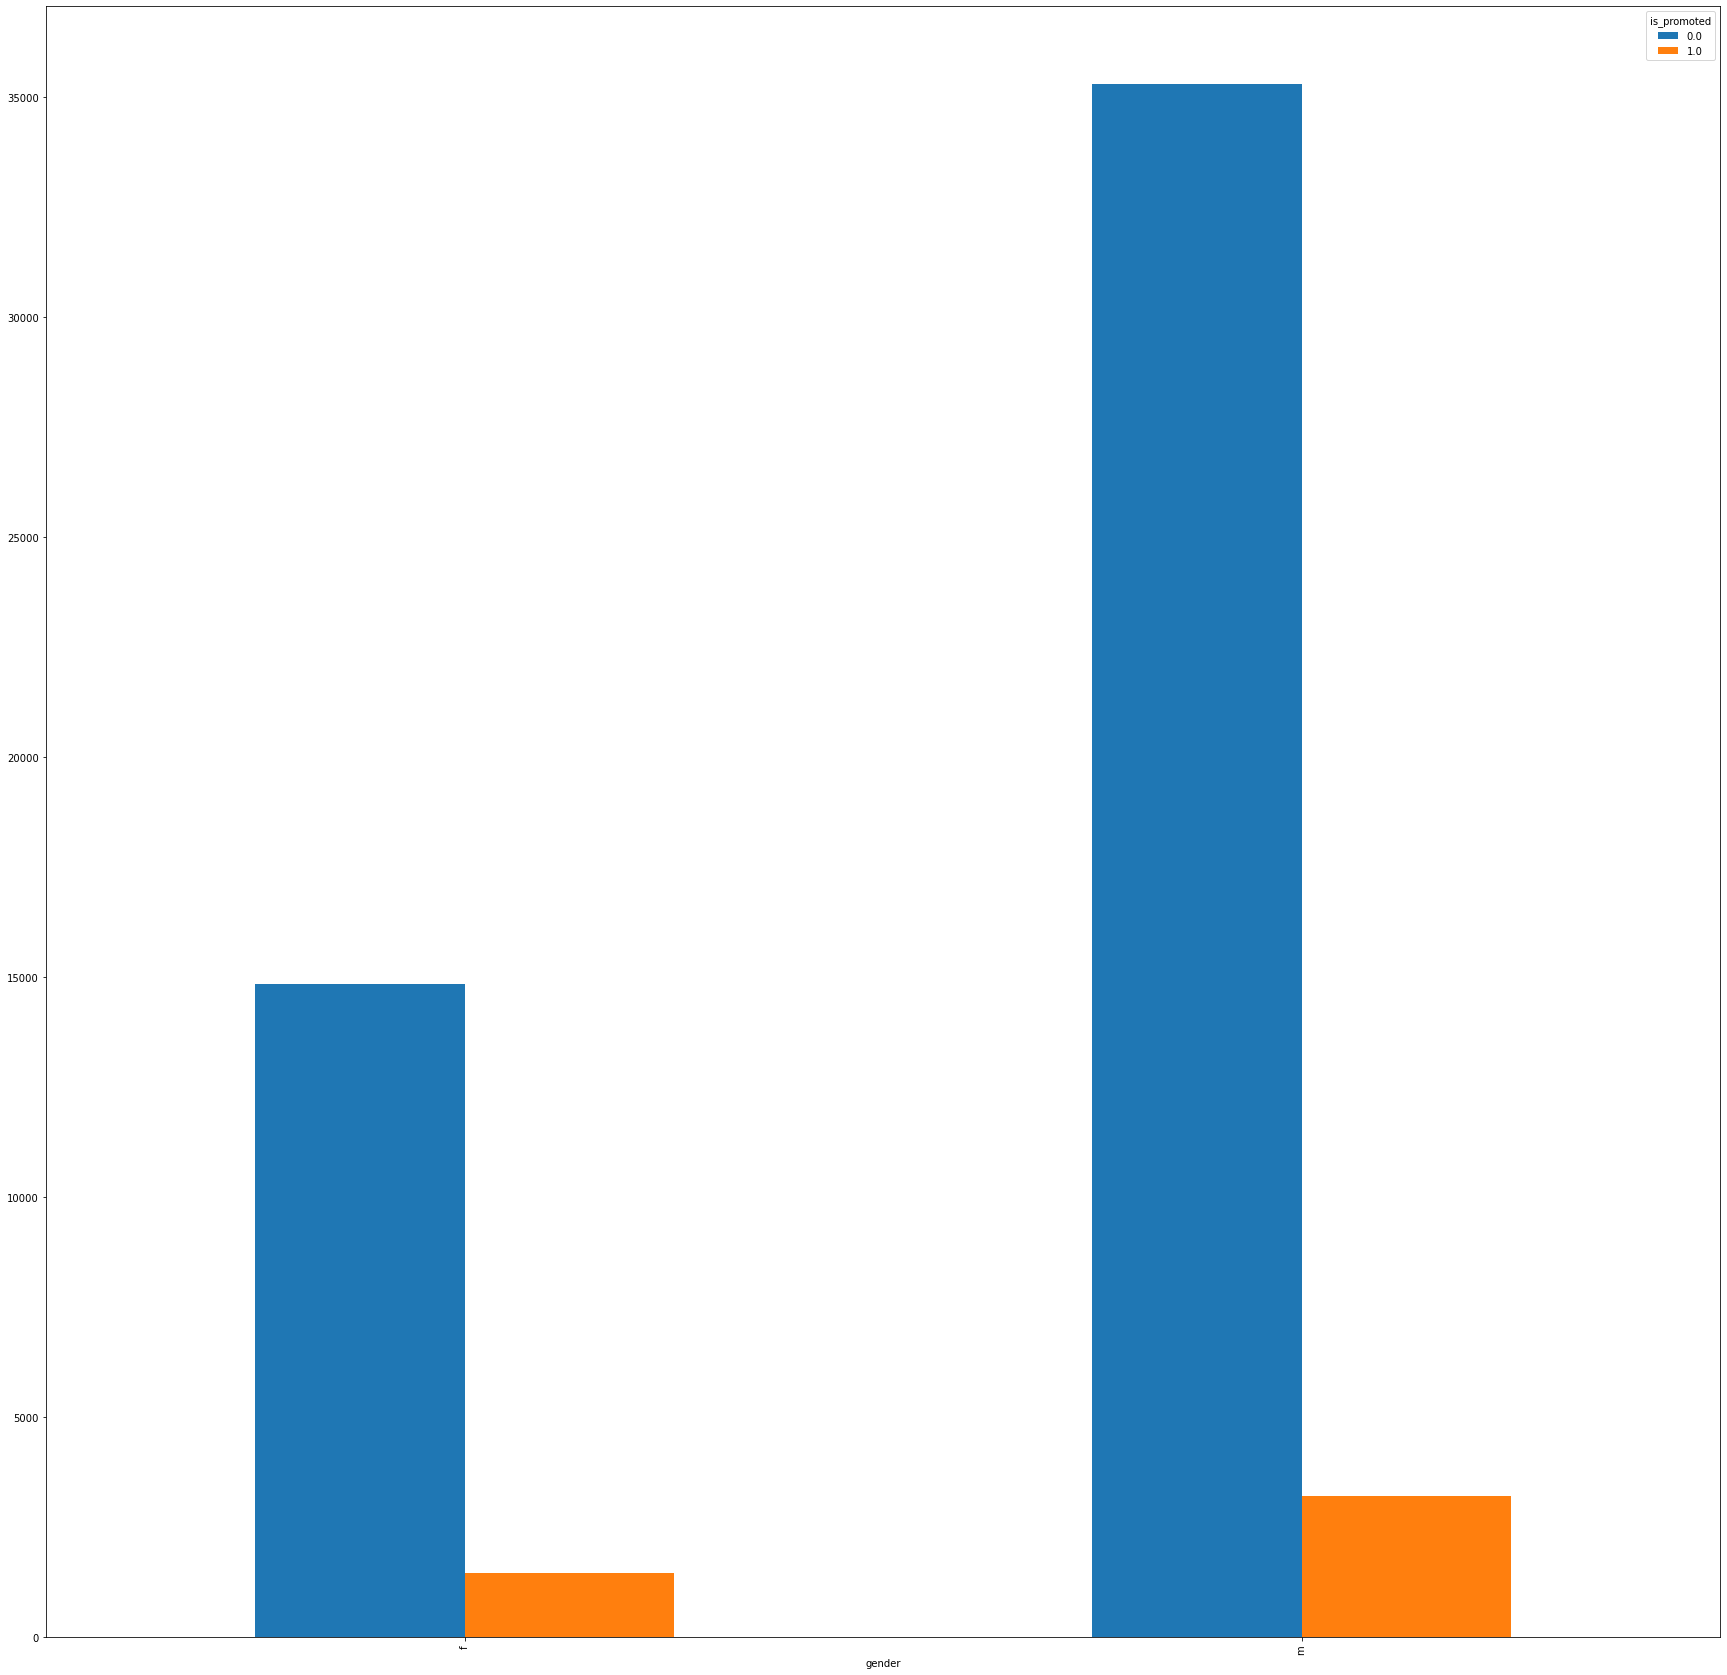

In [149]:
pd.crosstab(combine.gender,combine.is_promoted).plot(kind='bar')
plt.show()

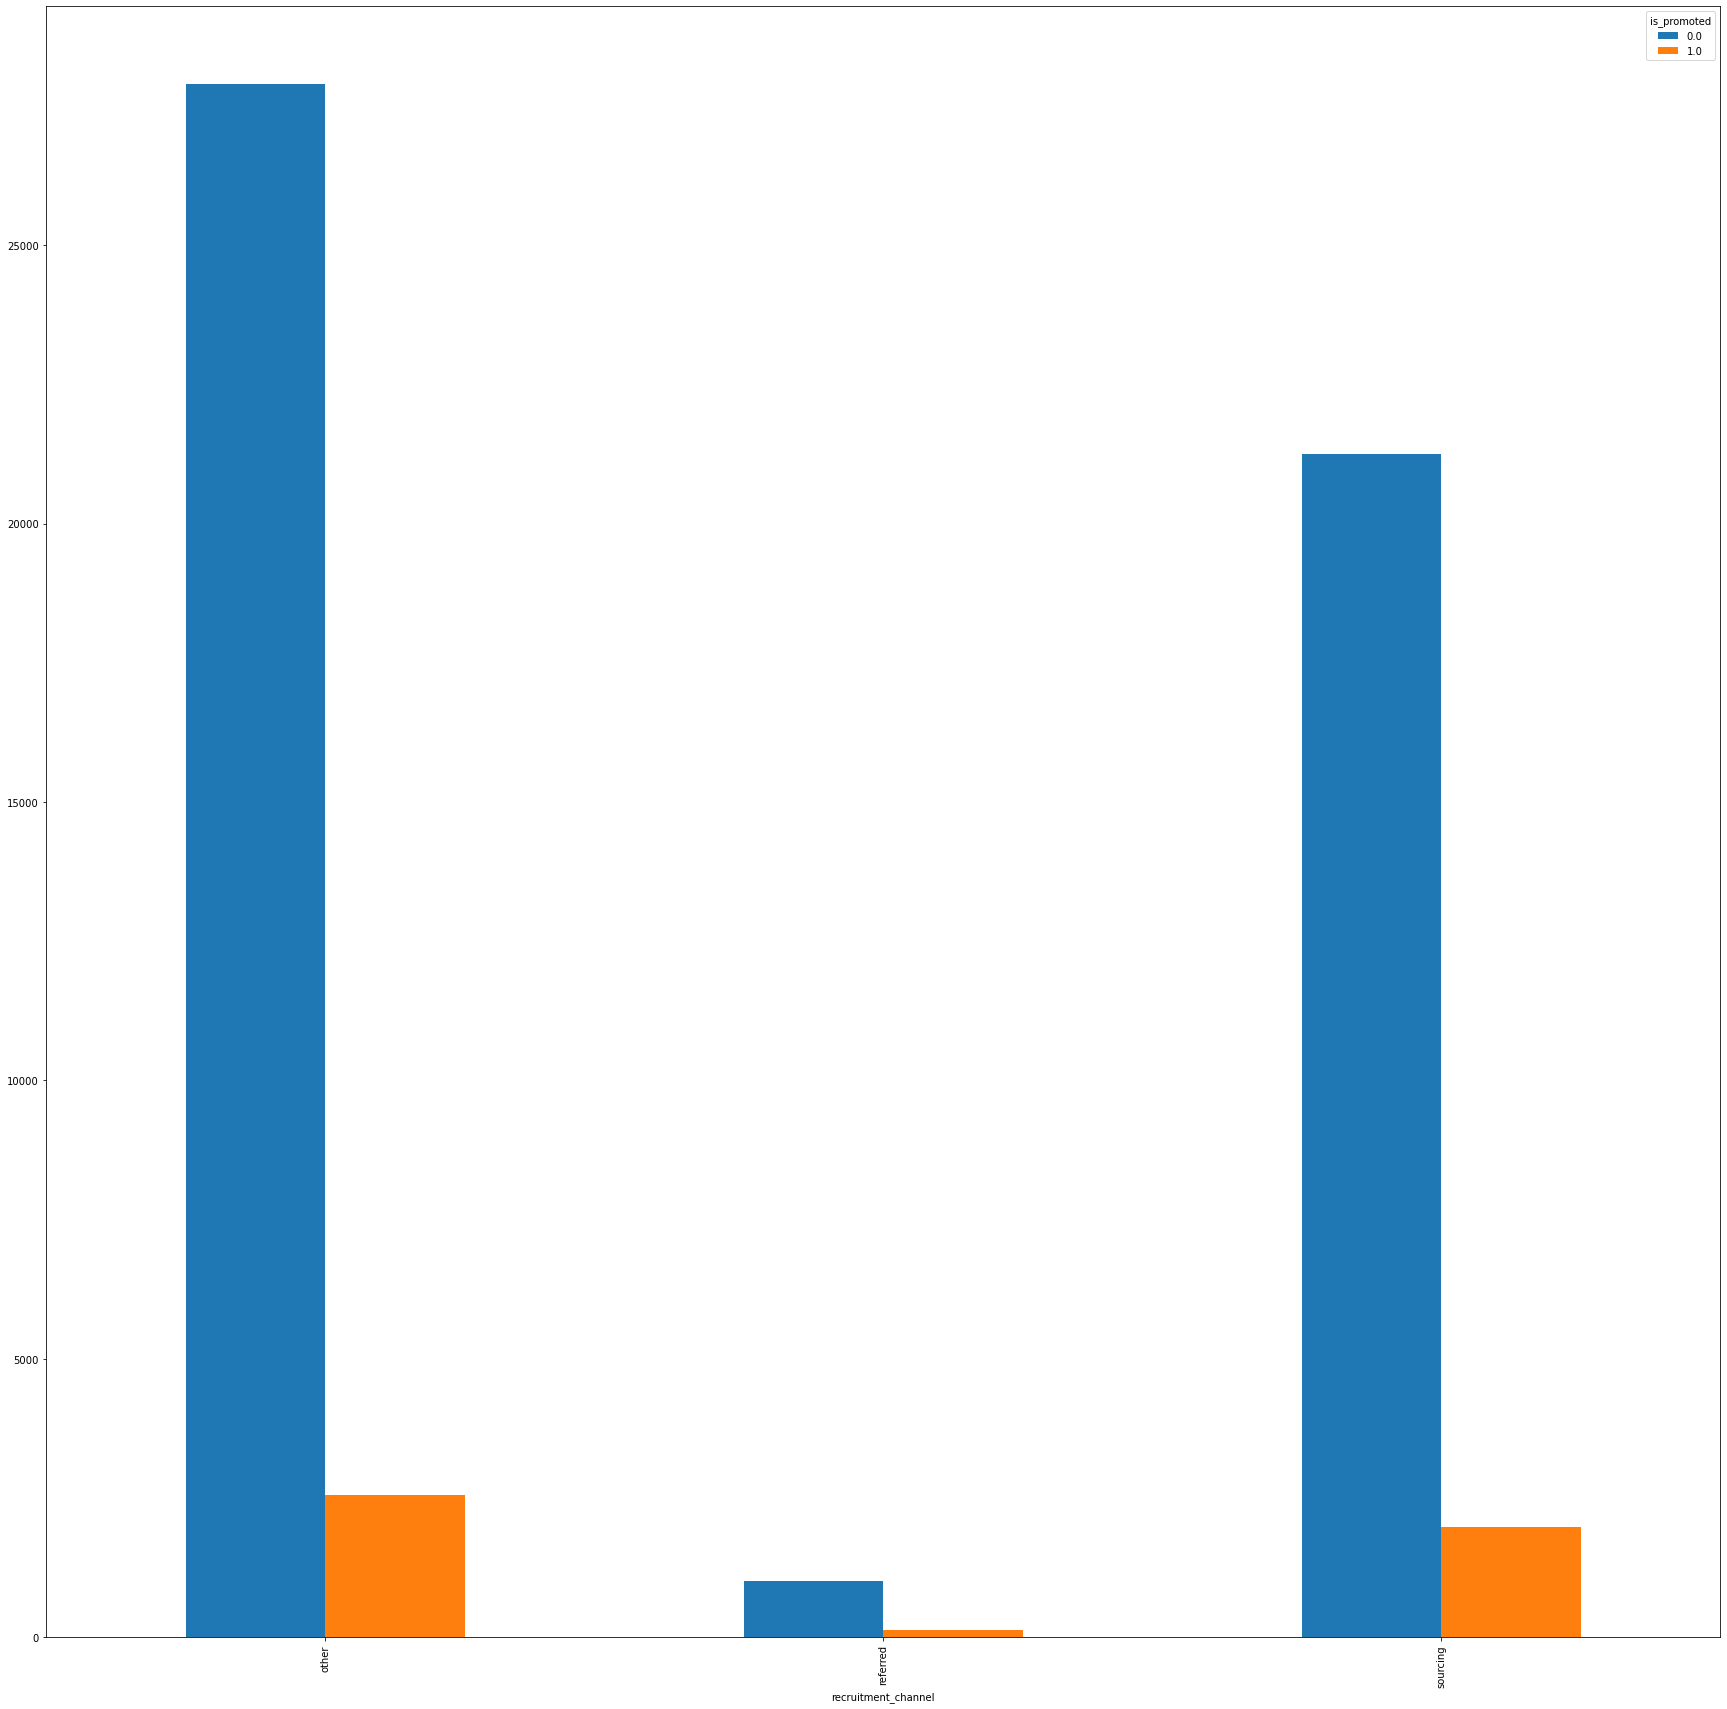

In [150]:
pd.crosstab(combine.recruitment_channel,combine.is_promoted).plot(kind='bar')
plt.show()

In [151]:
combine.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

<AxesSubplot:xlabel='is_promoted', ylabel='no_of_trainings'>

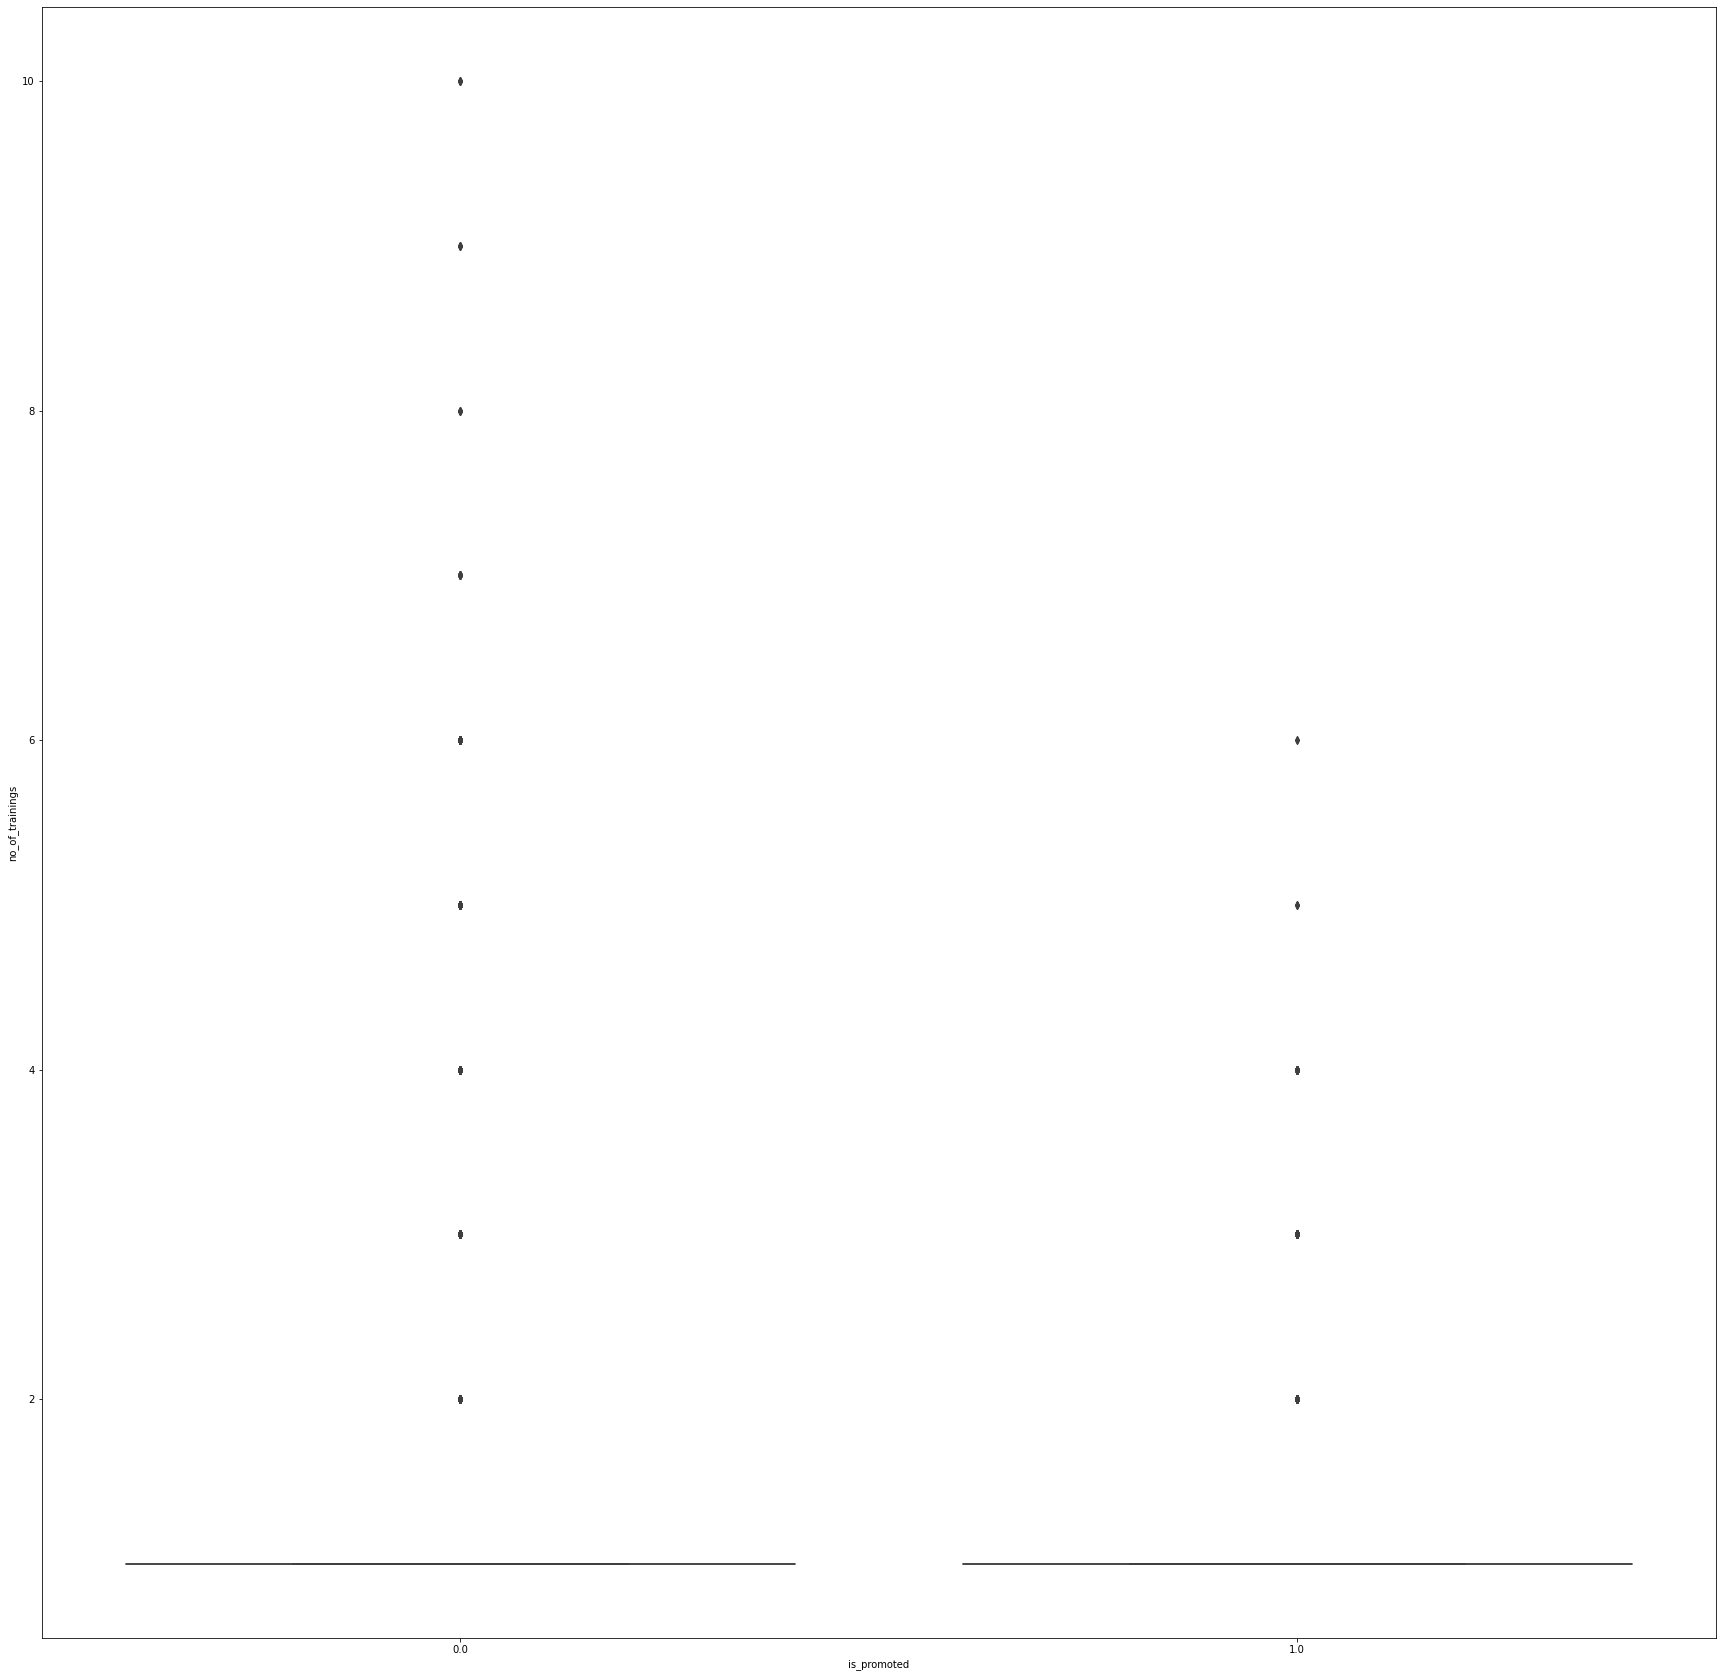

In [152]:
sns.boxplot(x='is_promoted',y='no_of_trainings',data=combine)

<AxesSubplot:xlabel='is_promoted', ylabel='age'>

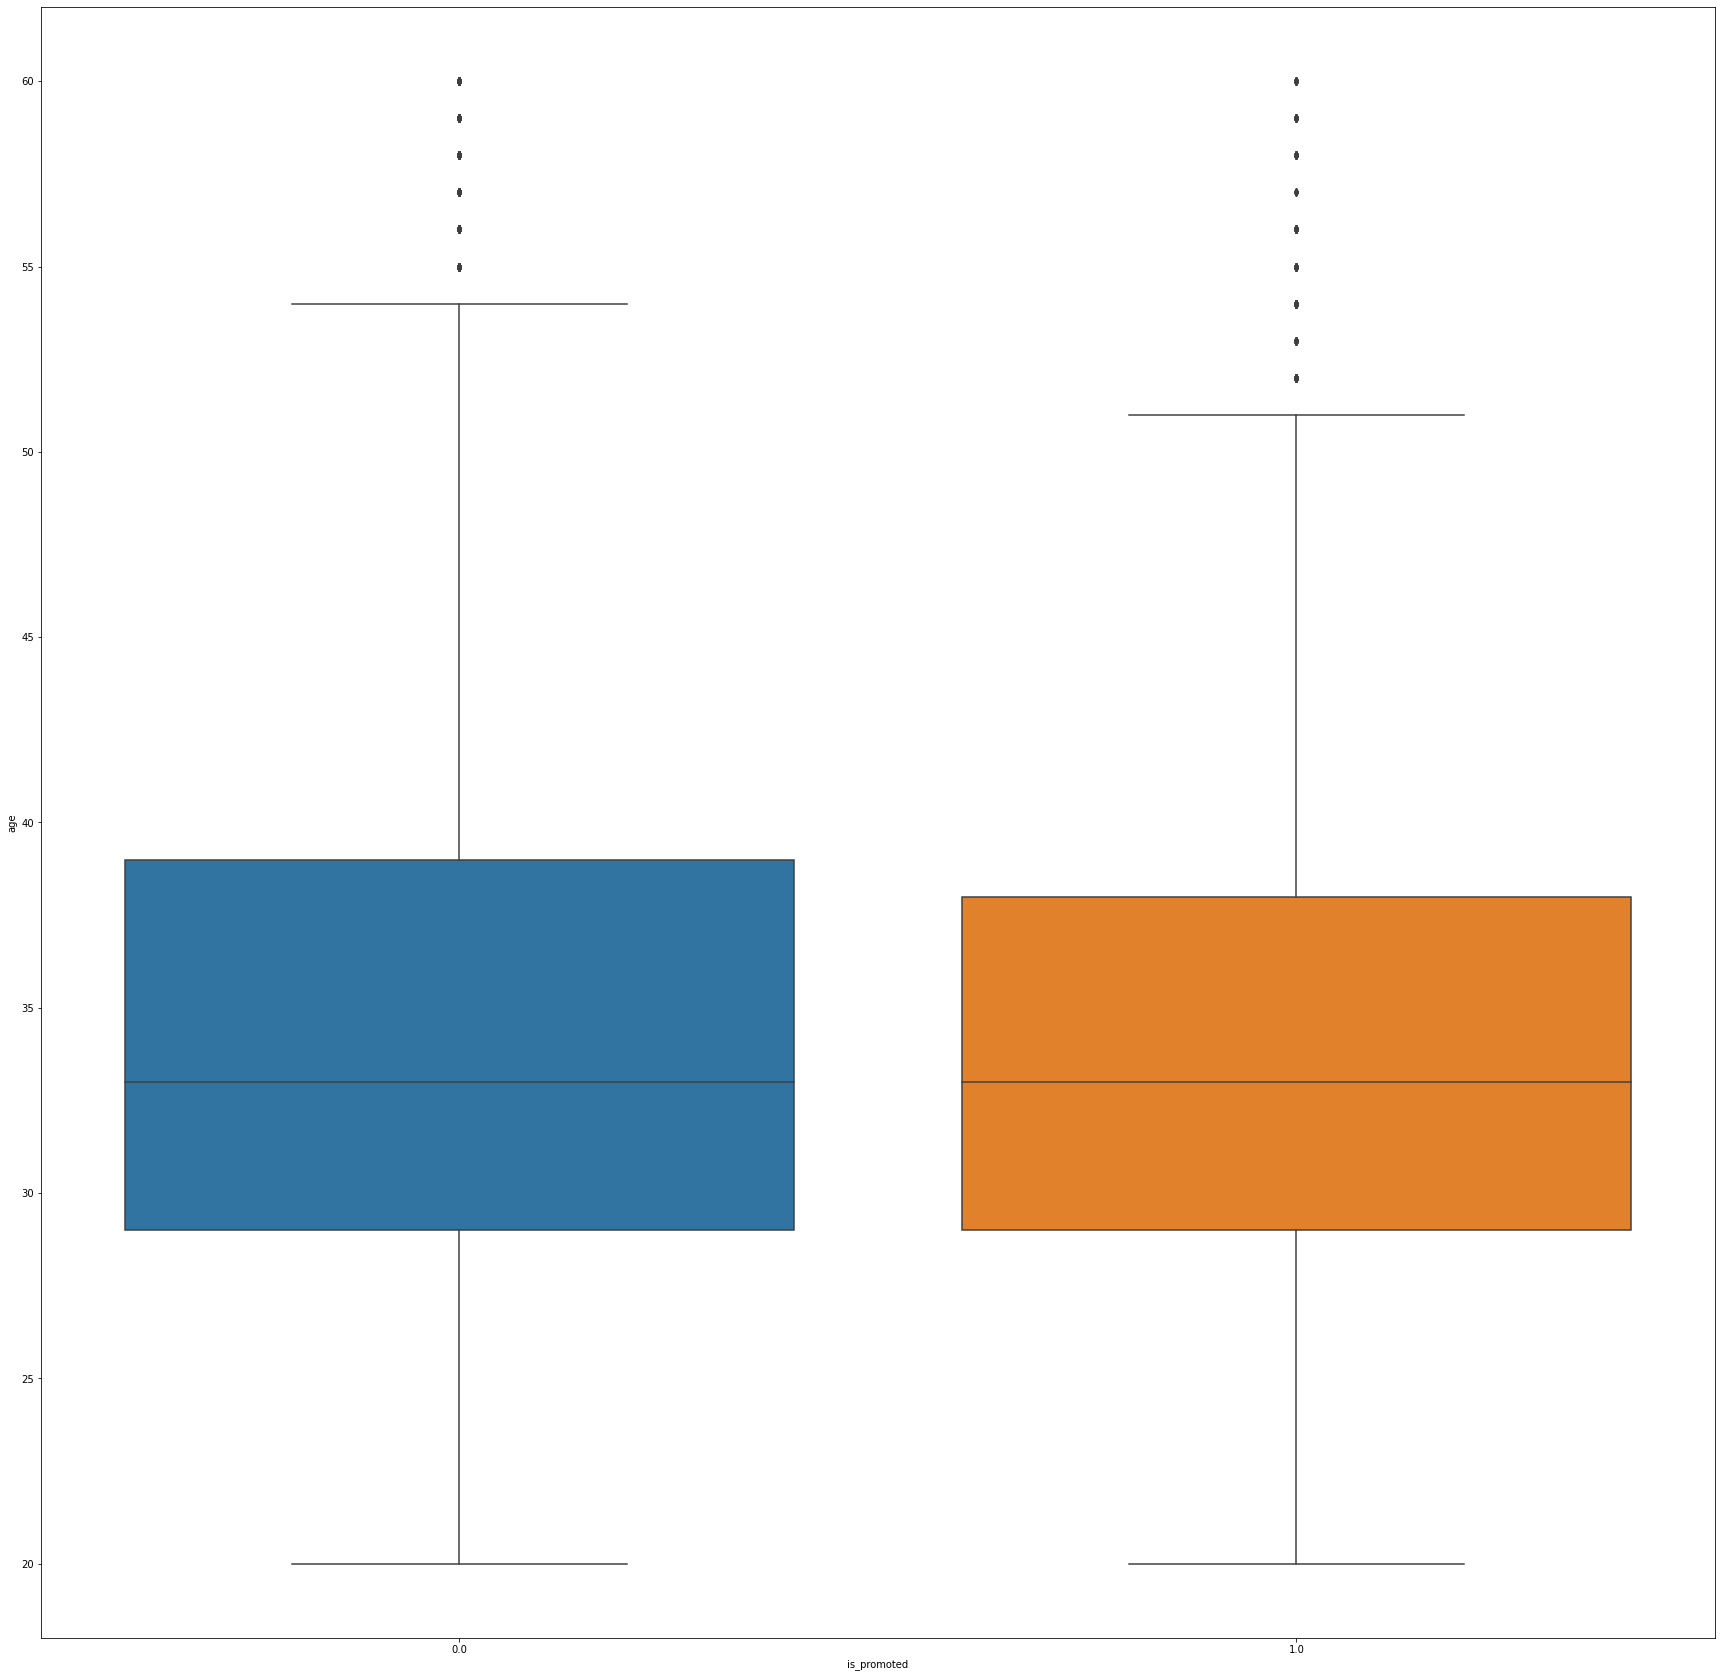

In [153]:
sns.boxplot(x='is_promoted',y='age',data=combine)

<AxesSubplot:xlabel='is_promoted', ylabel='previous_year_rating'>

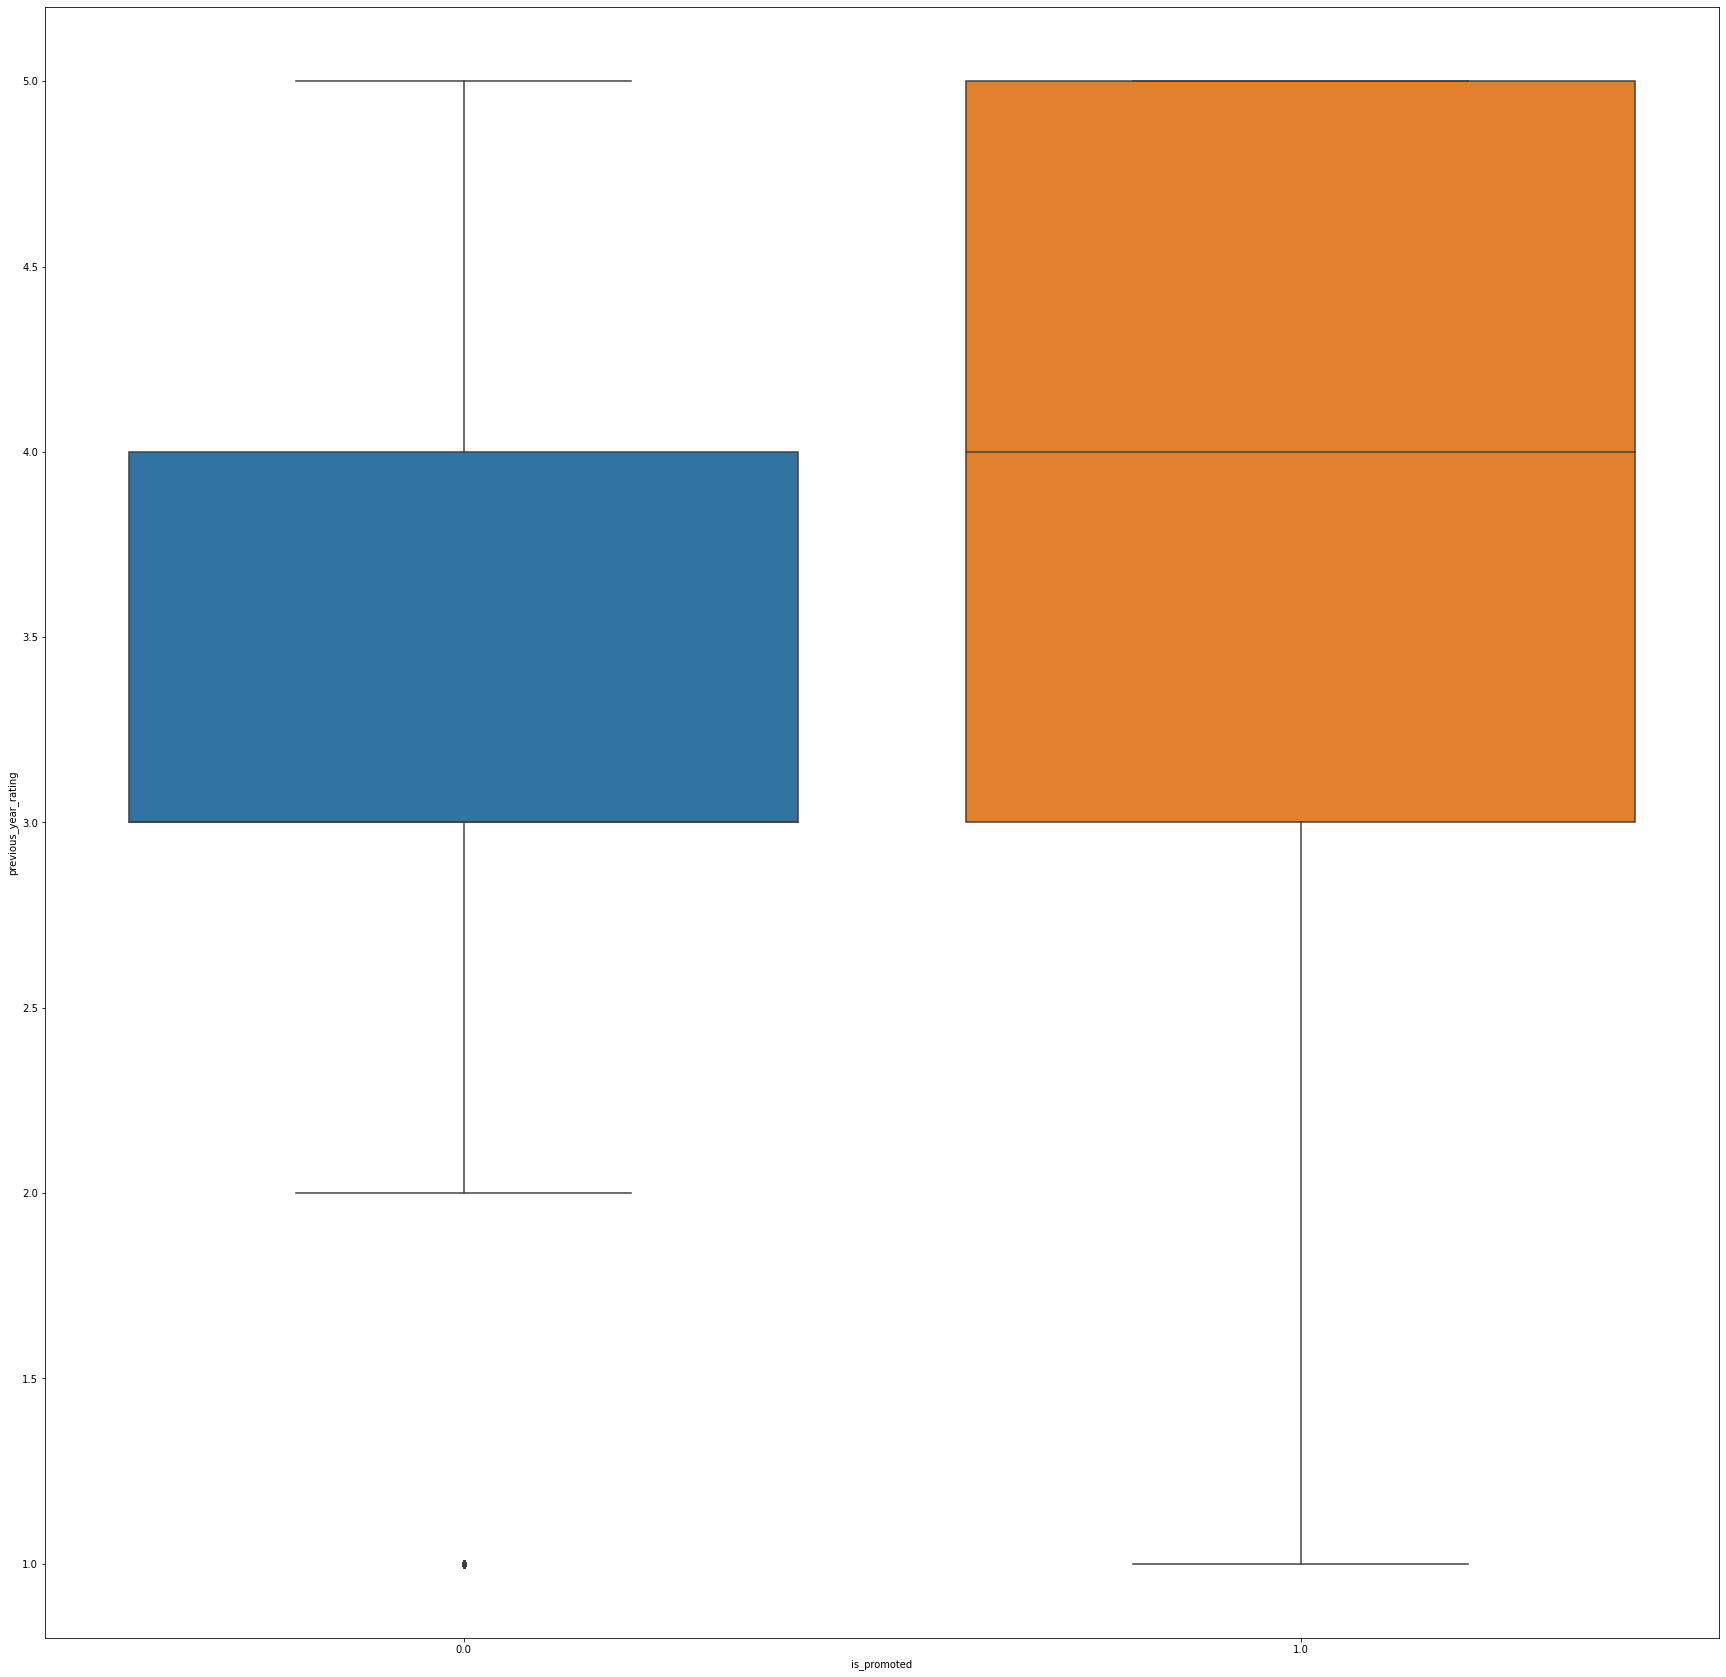

In [154]:
sns.boxplot(x='is_promoted',y='previous_year_rating',data=combine)

<AxesSubplot:xlabel='is_promoted', ylabel='length_of_service'>

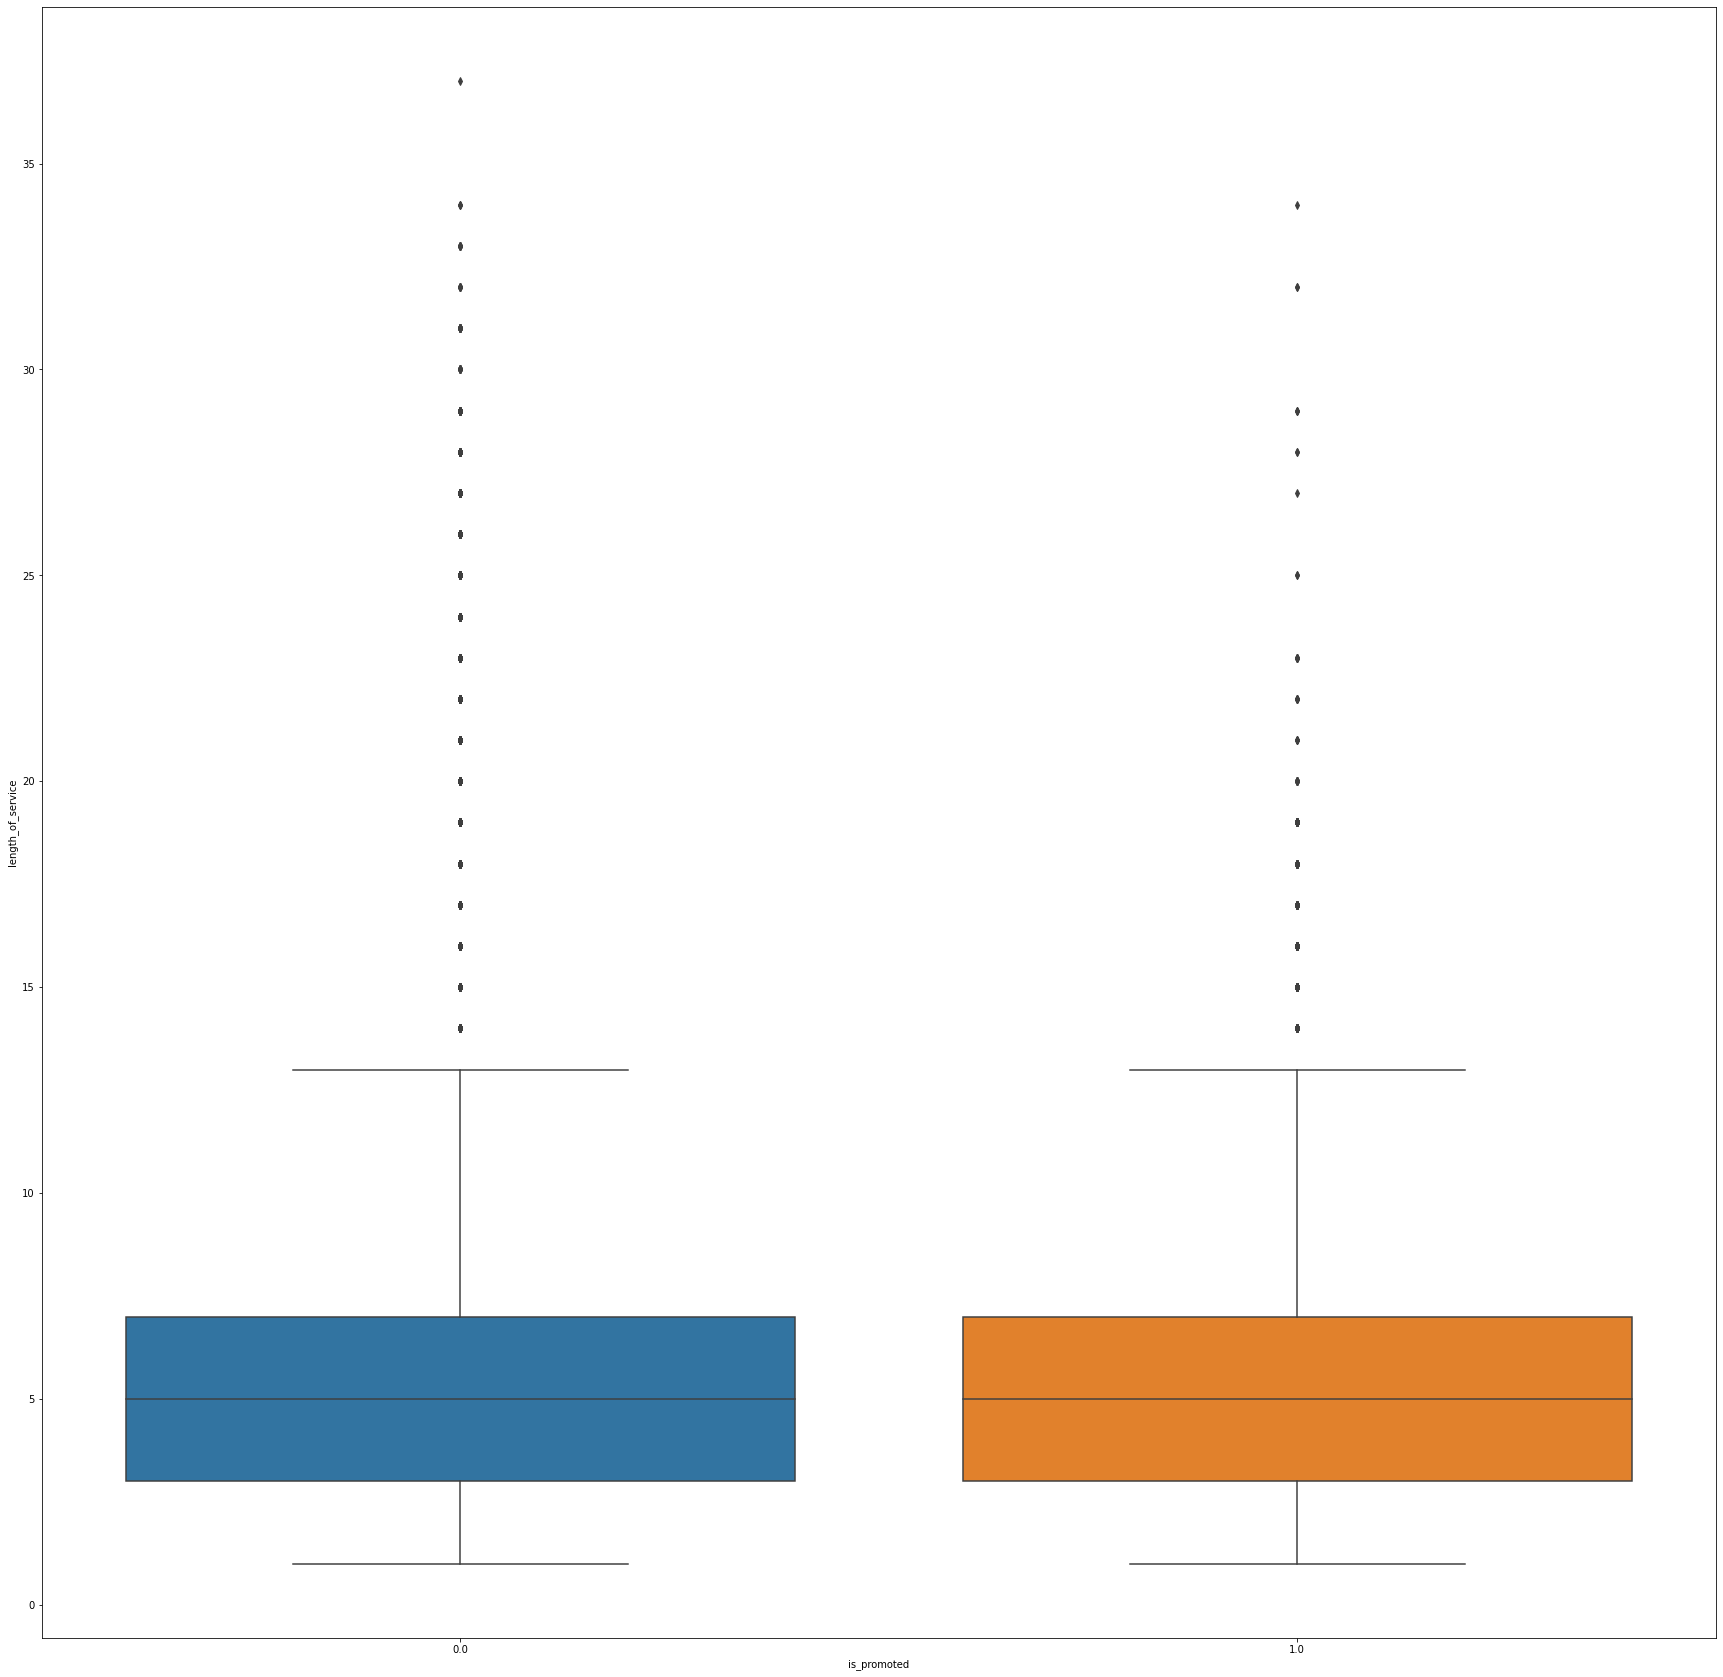

In [155]:
sns.boxplot(x='is_promoted',y='length_of_service',data=combine)

<AxesSubplot:xlabel='is_promoted', ylabel='KPIs_met >80%'>

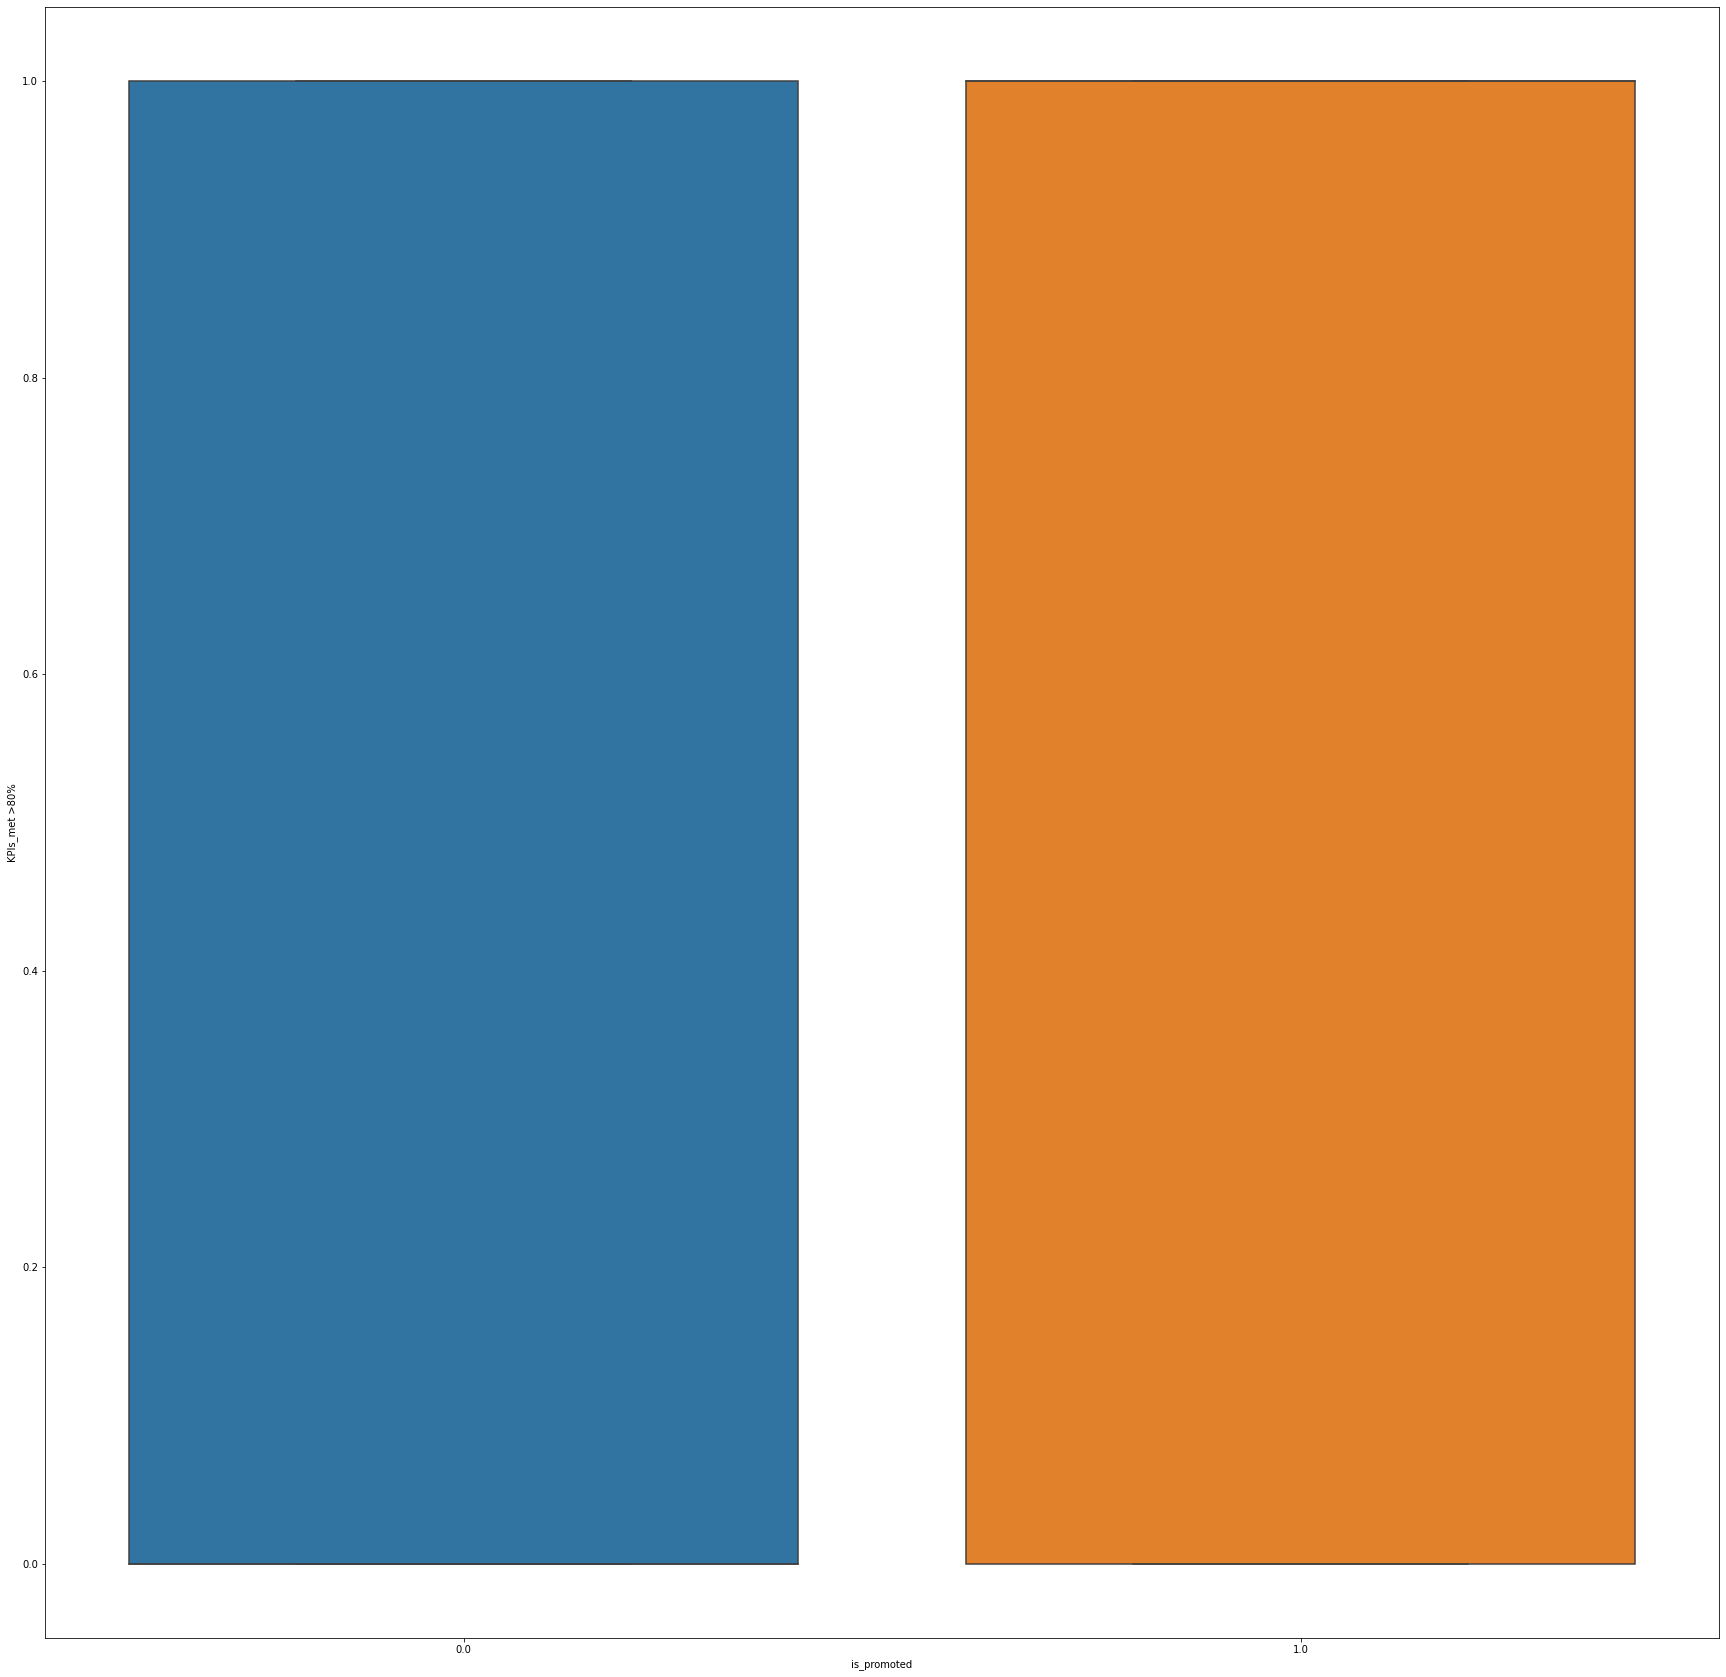

In [156]:
sns.boxplot(x='is_promoted',y='KPIs_met >80%',data=combine)

In [157]:
combine

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


<AxesSubplot:xlabel='is_promoted', ylabel='avg_training_score'>

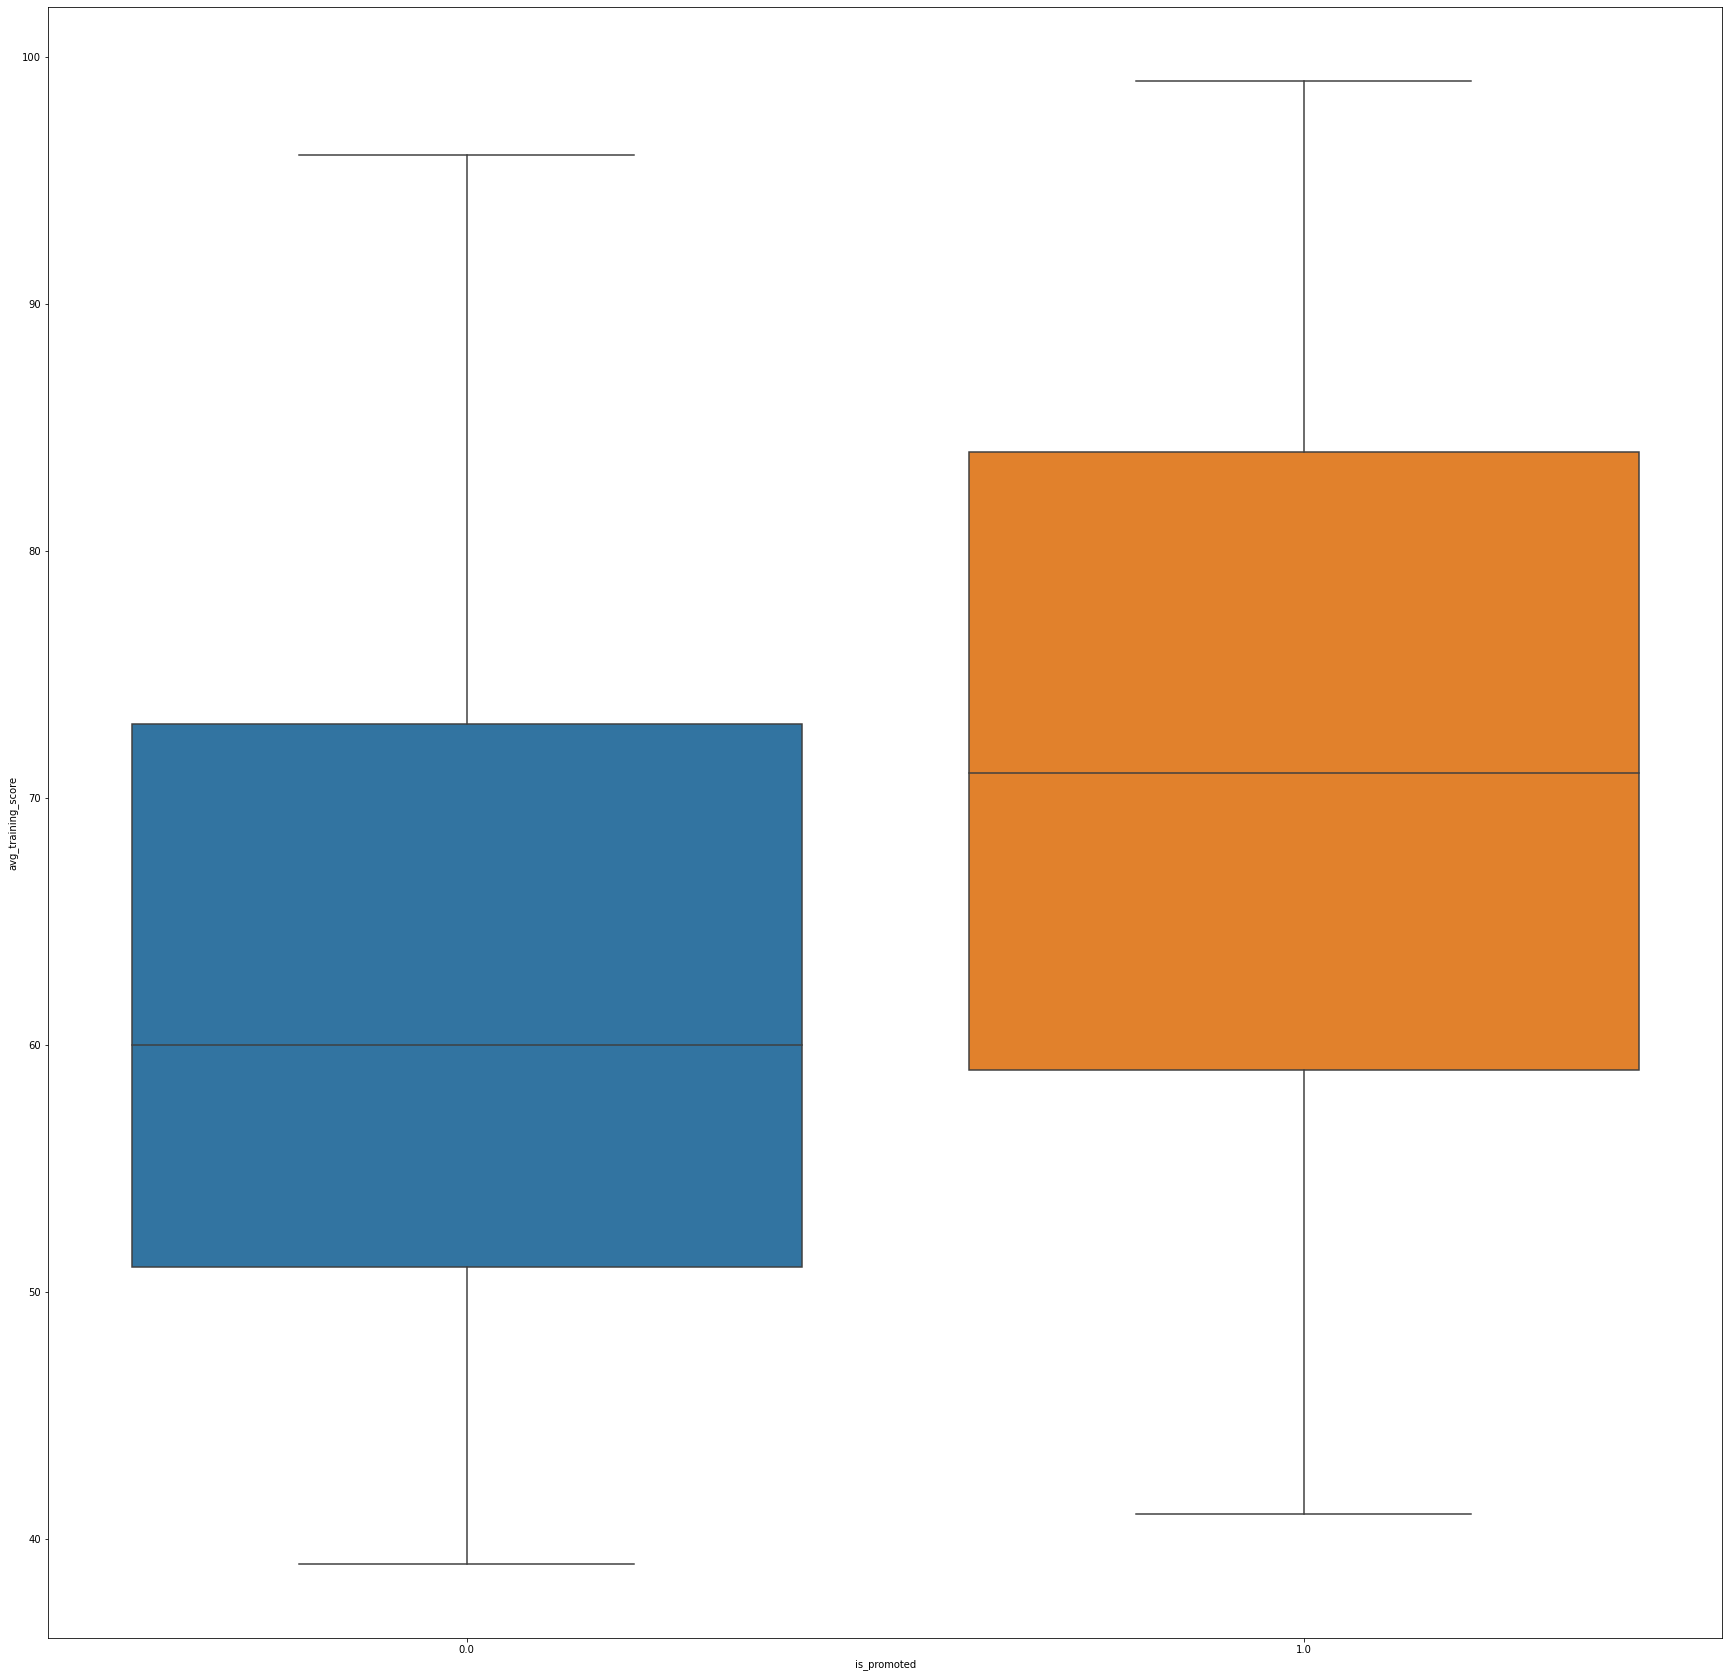

In [158]:
sns.boxplot(x='is_promoted',y='avg_training_score',data=combine)

In [159]:
combine


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


In [160]:
def regions(x):
    a=x.split('_')
    return a[1]

In [161]:
combine['region']=combine.region.apply(regions)

In [162]:
combine.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [163]:
combine.gender=combine.gender.replace({'m':1,'f':0})

In [164]:
combine

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,2,Below Secondary,1,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,25,Bachelor's,1,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,16,Bachelor's,0,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,31,Bachelor's,1,sourcing,3,27,NaN,1,0,0,70,NaN


In [165]:
combine.drop(['employee_id'],axis=1,inplace=True)

In [166]:
combine

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0.0
3,Sales & Marketing,23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0.0
4,Technology,26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,2,Below Secondary,1,sourcing,1,24,3.0,1,0,0,61,NaN
23486,Technology,25,Bachelor's,1,sourcing,1,31,3.0,7,0,0,74,NaN
23487,HR,16,Bachelor's,0,sourcing,1,26,4.0,4,0,0,50,NaN
23488,Procurement,31,Bachelor's,1,sourcing,3,27,NaN,1,0,0,70,NaN


In [167]:
combine.isnull().sum()


department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

# Missing Values Treatment ::


In [168]:
combine.loc[combine.education.isnull()]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,23,NaN,1,sourcing,1,30,NaN,1,0,0,77,0.0
21,Operations,15,NaN,1,sourcing,1,41,4.0,11,0,0,57,0.0
32,Sales & Marketing,7,NaN,0,sourcing,1,24,1.0,2,0,0,48,0.0
43,Sales & Marketing,2,NaN,1,other,3,24,2.0,2,0,0,48,0.0
82,Sales & Marketing,2,NaN,1,sourcing,2,25,3.0,2,0,0,53,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23415,Sales & Marketing,7,NaN,1,other,6,26,3.0,3,0,0,48,NaN
23424,Analytics,15,NaN,1,sourcing,1,34,3.0,5,0,0,87,NaN
23452,Analytics,15,NaN,1,sourcing,1,30,2.0,7,0,0,83,NaN
23459,Sales & Marketing,22,NaN,1,other,1,31,2.0,7,0,0,52,NaN


In [169]:
df1=pd.DataFrame(combine.groupby(['department','region','gender'])['education'].agg(lambda x:x.value_counts().index[0])).reset_index()
df1

,department,region,gender,education
0,Analytics,1,1,Master's & above
1,Analytics,10,1,Master's & above
2,Analytics,11,0,Bachelor's
3,Analytics,11,1,Bachelor's
4,Analytics,12,1,Bachelor's
...,...,...,...,...
507,Technology,7,1,Bachelor's
508,Technology,8,0,Bachelor's
509,Technology,8,1,Bachelor's
510,Technology,9,0,Bachelor's


In [170]:
for i,j,k,l in zip(df1.department,df1.region,df1.gender,df1.education):
    combine.loc[(combine.department==i)&(combine.region==j)&(combine.gender==k)&(combine.education.isnull()),'education']=l

In [171]:
# As we have imputed the missing values in education by grouping the data 
# Using lambda function and group by to grouping the data 
# Then imputed the values as per the other columns into the data 


In [172]:
combine.isnull().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [173]:
combine.loc[combine.previous_year_rating.isnull()]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,23,Bachelor's,1,sourcing,1,30,NaN,1,0,0,77,0.0
23,Procurement,5,Bachelor's,1,other,1,27,NaN,1,0,0,70,0.0
29,Sales & Marketing,4,Bachelor's,1,sourcing,1,26,NaN,1,0,0,44,0.0
56,Sales & Marketing,31,Bachelor's,0,other,1,29,NaN,1,0,0,49,0.0
58,Sales & Marketing,16,Bachelor's,1,other,2,27,NaN,1,1,0,47,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23406,Operations,4,Bachelor's,1,sourcing,1,32,NaN,1,1,0,62,NaN
23436,Technology,2,Bachelor's,0,referred,1,29,NaN,1,0,0,79,NaN
23445,Analytics,31,Bachelor's,1,sourcing,3,28,NaN,1,0,0,86,NaN
23479,Sales & Marketing,2,Bachelor's,1,other,3,20,NaN,1,0,0,49,NaN


<AxesSubplot:xlabel='previous_year_rating'>

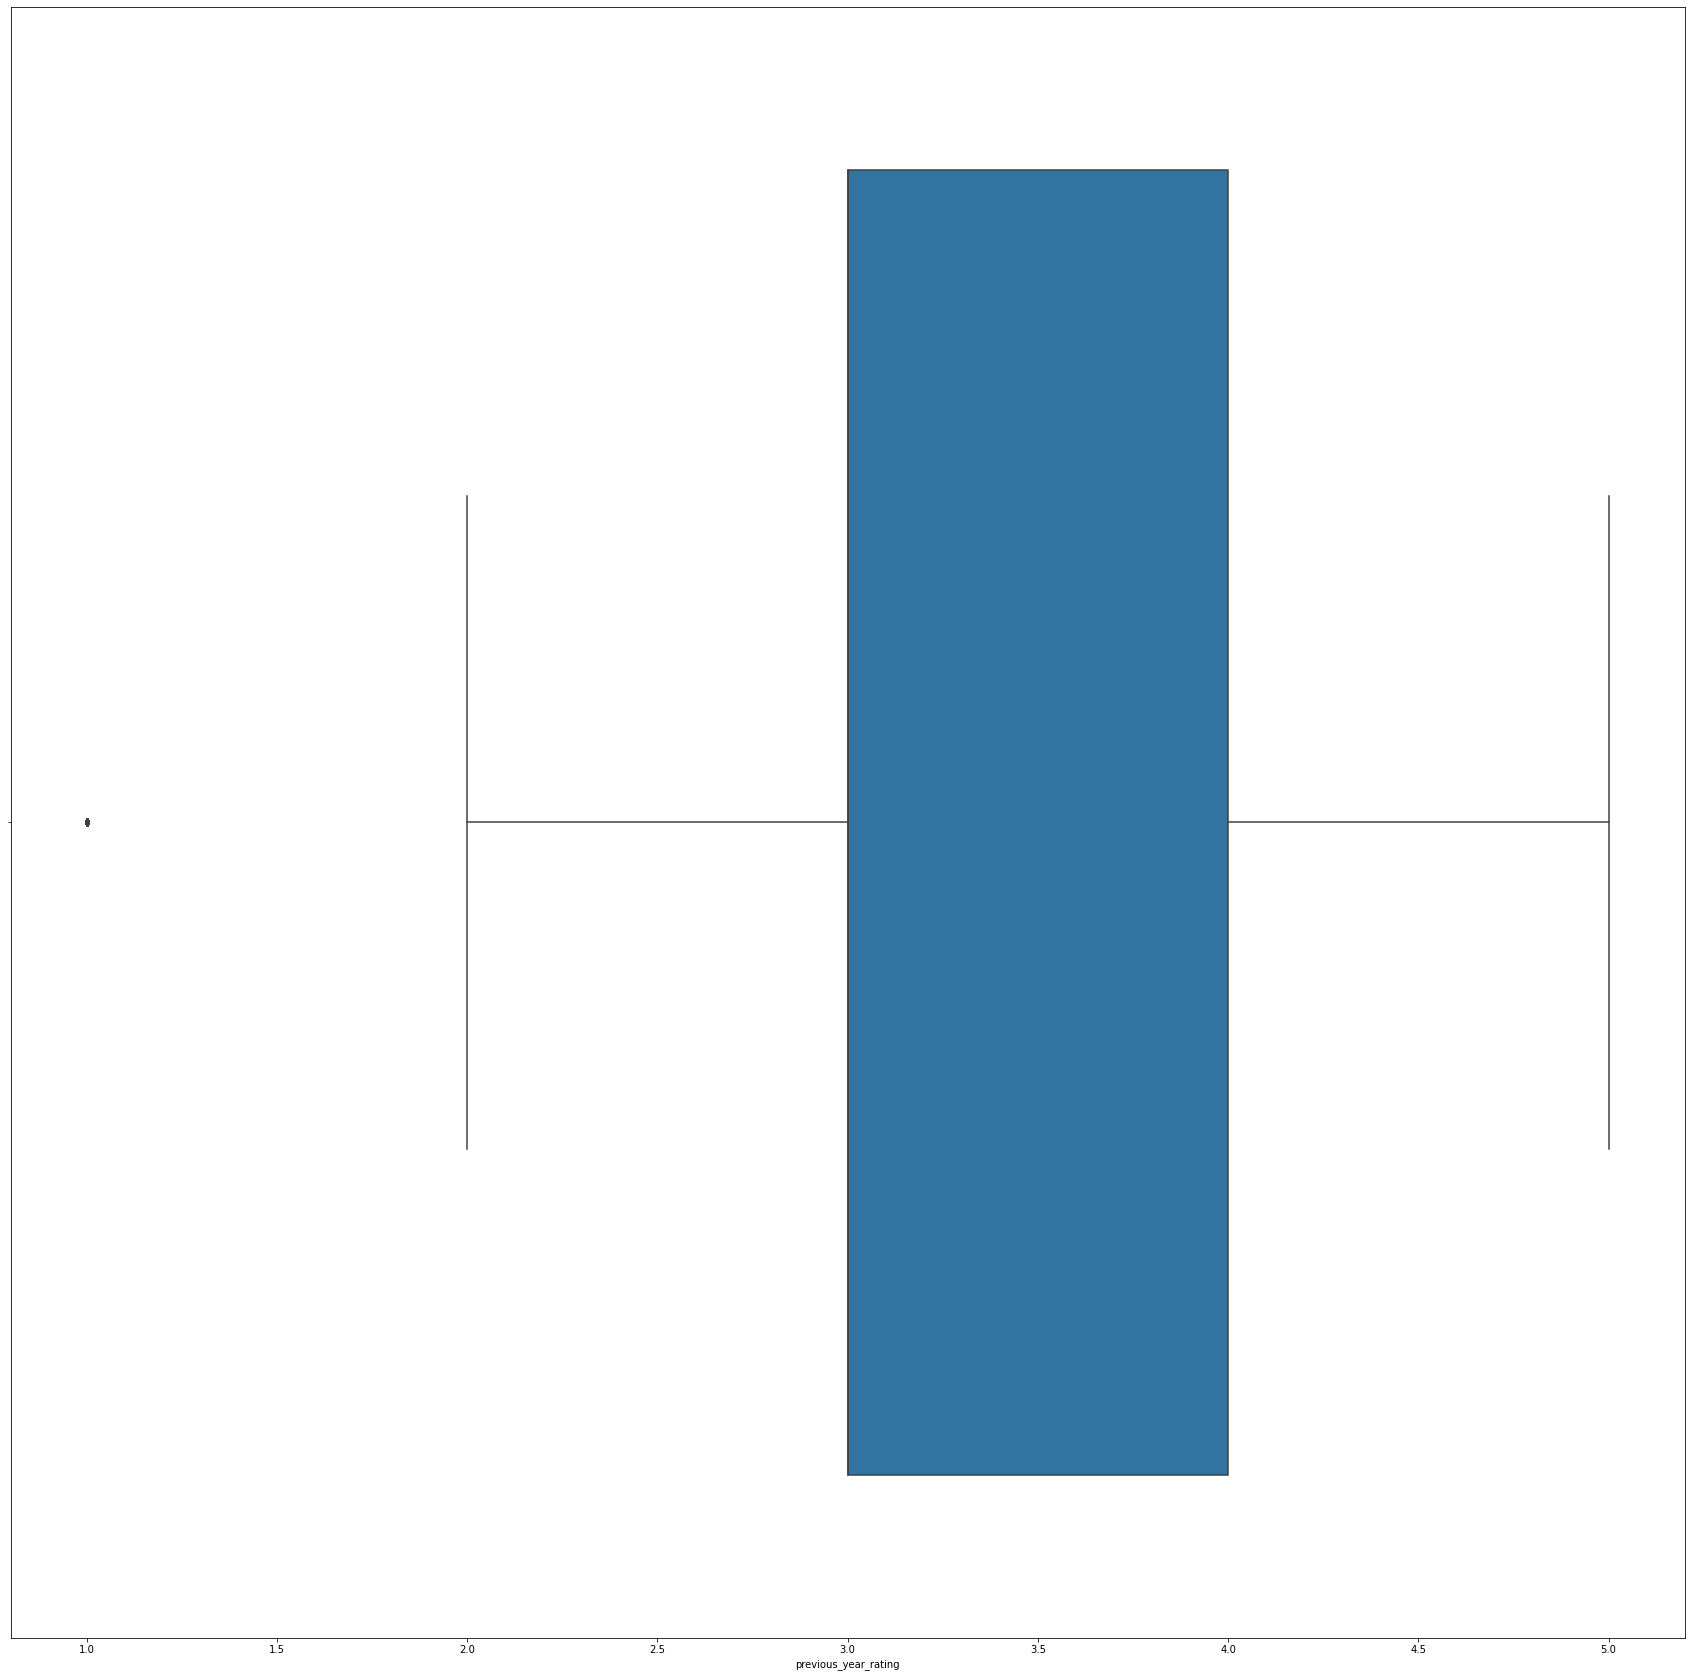

In [174]:
sns.boxplot(combine.previous_year_rating)

In [175]:
# As we can see that there  is no outliers so we will go with mean to fill the missing values 

In [176]:
np.absolute(combine.previous_year_rating.mean())

3.3322185677565574

In [177]:
combine.previous_year_rating.unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [178]:
combine.previous_year_rating=combine.previous_year_rating.fillna(3)


In [179]:
combine.isnull().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [180]:
# As the missing values are treated  for the data.
# We have took the mean of the data as there were no outliers in ithe previous 

# Scalling the data for Model prepration

In [181]:
combine

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0.0
3,Sales & Marketing,23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0.0
4,Technology,26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,2,Below Secondary,1,sourcing,1,24,3.0,1,0,0,61,NaN
23486,Technology,25,Bachelor's,1,sourcing,1,31,3.0,7,0,0,74,NaN
23487,HR,16,Bachelor's,0,sourcing,1,26,4.0,4,0,0,50,NaN
23488,Procurement,31,Bachelor's,1,sourcing,3,27,3.0,1,0,0,70,NaN


In [182]:
combine.dtypes

department               object
region                   object
education                object
gender                    int64
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
dtype: object

In [183]:
combine.corr()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
gender,1.000000,0.084530,-0.017816,-0.023471,-0.017800,-0.037916,0.000553,-0.024840,-0.011109
no_of_trainings,0.084530,1.000000,-0.082536,-0.057310,-0.058403,-0.043912,-0.004818,0.044180,-0.024896
age,-0.017816,-0.082536,1.000000,0.030097,0.653339,-0.026223,-0.007357,-0.044592,-0.017166
previous_year_rating,-0.023471,-0.057310,0.030097,1.000000,0.024656,0.336612,0.026524,0.068547,0.153230
length_of_service,-0.017800,-0.058403,0.653339,0.024656,1.000000,-0.077854,-0.040556,-0.035272,-0.010670
KPIs_met >80%,-0.037916,-0.043912,-0.026223,0.336612,-0.077854,1.000000,0.100365,0.076729,0.221582
awards_won?,0.000553,-0.004818,-0.007357,0.026524,-0.040556,0.100365,1.000000,0.072655,0.195871
avg_training_score,-0.024840,0.044180,-0.044592,0.068547,-0.035272,0.076729,0.072655,1.000000,0.181147
is_promoted,-0.011109,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


In [184]:
combine.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0.0
3,Sales & Marketing,23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0.0
4,Technology,26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0.0


In [185]:
combine.no_of_trainings.unique()

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9])

In [186]:
combine.dtypes

department               object
region                   object
education                object
gender                    int64
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
dtype: object

In [187]:
comb1=combine.copy()

In [188]:
comb1.gender=comb1.gender.astype(object)

In [189]:
comb1

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0.0
3,Sales & Marketing,23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0.0
4,Technology,26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,2,Below Secondary,1,sourcing,1,24,3.0,1,0,0,61,NaN
23486,Technology,25,Bachelor's,1,sourcing,1,31,3.0,7,0,0,74,NaN
23487,HR,16,Bachelor's,0,sourcing,1,26,4.0,4,0,0,50,NaN
23488,Procurement,31,Bachelor's,1,sourcing,3,27,3.0,1,0,0,70,NaN


In [190]:
comb1.no_of_trainings=comb1.no_of_trainings.astype(object)
comb1.previous_year_rating=comb1.previous_year_rating.astype(object)
comb1['KPIs_met >80%']=comb1['KPIs_met >80%'].astype(object)
comb1['awards_won?']=comb1['awards_won?'].astype(object)

In [191]:
comb1.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings          object
age                       int64
previous_year_rating     object
length_of_service         int64
KPIs_met >80%            object
awards_won?              object
avg_training_score        int64
is_promoted             float64
dtype: object

In [192]:
dummydata=pd.get_dummies(comb1,drop_first=True)

# Splitting the Test Train Data 

In [193]:
train.shape

(54808, 14)

In [194]:
test.shape

(23490, 13)

In [195]:
newtrain=dummydata.iloc[0:train.shape[0],:]
newtest=dummydata.iloc[train.shape[0]:]

In [196]:
newtrain.shape

(54808, 65)

In [197]:
newtest.shape

(23490, 65)

In [198]:
newtest=newtest.drop('is_promoted',axis=1)

# Scalling the Numeric variable 

In [199]:
from sklearn.preprocessing import StandardScaler

In [200]:
sc=StandardScaler()

In [201]:
df=pd.DataFrame(sc.fit_transform(newtrain.loc[:,['avg_training_score','age']]),columns=['avg_training_score_scaled','age_scaled'])

In [202]:
newtrain['age']=df['age_scaled']
newtrain['avg_training_score']=df['avg_training_score_scaled']

In [203]:
newtrain

,age,length_of_service,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,...,no_of_trainings_7,no_of_trainings_8,no_of_trainings_9,no_of_trainings_10,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1
0,0.025598,8,-1.075931,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,-0.627135,4,-0.253282,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.104948,7,-1.001145,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.547785,10,-1.001145,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.331064,2,0.718939,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.722704,17,1.092871,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
54804,0.286691,6,-0.552428,0.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
54805,-1.018775,3,1.167657,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
54806,-0.757681,2,-1.375077,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelling

# Random Forest Classifier 

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [205]:
xtrain=newtrain.drop('is_promoted',axis=1)
ytrain=newtrain['is_promoted']

In [206]:
model1=RandomForestClassifier(n_estimators=150,random_state=42)
model1.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=150, random_state=42)

In [207]:
pred1=model1.predict(newtest)

In [208]:
pred1

array([1., 1., 1., ..., 1., 1., 1.])

In [209]:
min(pred1), max(pred1)

(0.0, 1.0)

In [210]:
predicted=pd.DataFrame(pred1)

In [211]:
predicted.value_counts()

1.0    23344
0.0      146
dtype: int64

In [212]:
d=test["employee_id"]

In [213]:
d = pd.concat([d,predicted],axis=1)

In [262]:
d.columns=["employee_id","is_promoted"]

In [267]:
import os
os.chdir('/Users/Abhi/Downloads/')
d.to_csv("randomF5.csv",index=False)

In [266]:
d['is_promoted']=d['is_promoted'].astype(int)

In [216]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [217]:
conda install lightgbm

/ 
Note: you may need to restart the kernel to use updated packages.


In [232]:
from lightgbm import LGBMClassifier

In [233]:
lgb=LGBMClassifier()
model=lgb.fit(xtrain,ytrain)


In [234]:
pd.DataFrame(model.predict(newtest)).value_counts()

1.0    23431
0.0       59
dtype: int64

In [221]:
x=pd.crosstab(combine.recruitment_channel,combine.is_promoted)

In [222]:
x.loc[:,1]/(x.loc[:,0]+x.loc[:,1]) # Label encoding

recruitment_channel
other       0.083952
referred    0.120841
sourcing    0.085013
dtype: float64

In [223]:
comb1.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings          object
age                       int64
previous_year_rating     object
length_of_service         int64
KPIs_met >80%            object
awards_won?              object
avg_training_score        int64
is_promoted             float64
dtype: object

In [224]:
y=pd.crosstab(combine.education,combine.is_promoted)

In [225]:
y.loc[:,1]/(y.loc[:,0]+y.loc[:,1]) #get dummies

education
Bachelor's          0.080086
Below Secondary     0.083230
Master's & above    0.098561
dtype: float64

In [226]:
z=pd.crosstab(combine.region,combine.is_promoted)

In [227]:
z.loc[:,1]/(z.loc[:,0]+z.loc[:,1]) # Binning by function

region
1     0.095082
10    0.078704
11    0.056274
12    0.066000
13    0.086858
14    0.074970
15    0.079060
16    0.069625
17    0.136935
18    0.032258
19    0.060641
2     0.080126
20    0.057647
21    0.043796
22    0.114188
23    0.116596
24    0.035433
25    0.125763
26    0.063274
27    0.078963
28    0.116844
29    0.043260
3     0.106936
30    0.089802
31    0.056848
32    0.042328
33    0.037175
34    0.027397
4     0.144451
5     0.045692
6     0.046377
7     0.106546
8     0.080916
9     0.019048
dtype: float64

In [228]:
m=pd.crosstab(combine.no_of_trainings,combine.is_promoted)

In [229]:
m.loc[:,1]/(m.loc[:,0]+m.loc[:,1]) # Label encoding

no_of_trainings
1     0.088107
2     0.075748
3     0.068694
4     0.055556
5     0.023438
6     0.045455
7     0.000000
8     0.000000
9     0.000000
10    0.000000
dtype: float64

In [230]:
comb1

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0.0
3,Sales & Marketing,23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0.0
4,Technology,26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,2,Below Secondary,1,sourcing,1,24,3.0,1,0,0,61,NaN
23486,Technology,25,Bachelor's,1,sourcing,1,31,3.0,7,0,0,74,NaN
23487,HR,16,Bachelor's,0,sourcing,1,26,4.0,4,0,0,50,NaN
23488,Procurement,31,Bachelor's,1,sourcing,3,27,3.0,1,0,0,70,NaN


In [231]:
education=dummies
region=binning
no of training= Int 
department=dummies
previous_year_rating=int
scale=age,avg_training_score


SyntaxError: invalid syntax (1822126528.py, line 3)

In [236]:
combine

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0
1,Operations,22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0.0
3,Sales & Marketing,23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0.0
4,Technology,26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,2,Below Secondary,1,sourcing,1,24,3.0,1,0,0,61,NaN
23486,Technology,25,Bachelor's,1,sourcing,1,31,3.0,7,0,0,74,NaN
23487,HR,16,Bachelor's,0,sourcing,1,26,4.0,4,0,0,50,NaN
23488,Procurement,31,Bachelor's,1,sourcing,3,27,3.0,1,0,0,70,NaN


In [237]:
# Changing the Approach of Feature Engineering

In [238]:
combine.dtypes

department               object
region                   object
education                object
gender                    int64
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
dtype: object

In [239]:
combine.drop('awards_won?',axis=1,inplace=True)

In [240]:
combine.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,0,sourcing,1,35,5.0,8,1,49,0.0
1,Operations,22,Bachelor's,1,other,1,30,5.0,4,0,60,0.0
2,Sales & Marketing,19,Bachelor's,1,sourcing,1,34,3.0,7,0,50,0.0
3,Sales & Marketing,23,Bachelor's,1,other,2,39,1.0,10,0,50,0.0
4,Technology,26,Bachelor's,1,other,1,45,3.0,2,0,73,0.0


In [241]:
x=pd.crosstab(combine.recruitment_channel,combine.is_promoted)
x.loc[:,1]/(x.loc[:,0]+x.loc[:,1])

recruitment_channel
other       0.083952
referred    0.120841
sourcing    0.085013
dtype: float64

In [242]:
comb2=combine.copy()

In [245]:
comb2['recruitment_channel']=comb2['recruitment_channel'].replace({'referred':1,'other':0,'sourcing':0})

In [248]:
comb2.recruitment_channel.unique()

array([0, 1])

In [249]:
comb2.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,0,0,1,35,5.0,8,1,49,0.0
1,Operations,22,Bachelor's,1,0,1,30,5.0,4,0,60,0.0
2,Sales & Marketing,19,Bachelor's,1,0,1,34,3.0,7,0,50,0.0
3,Sales & Marketing,23,Bachelor's,1,0,2,39,1.0,10,0,50,0.0
4,Technology,26,Bachelor's,1,0,1,45,3.0,2,0,73,0.0


In [270]:
z=pd.crosstab(combine.region,combine.is_promoted)
pd.DataFrame(z.loc[:,1]/(z.loc[:,0]+z.loc[:,1])).sort_values(by=0)

,0
region,
9,0.019048
34,0.027397
18,0.032258
24,0.035433
33,0.037175
32,0.042328
29,0.043260
21,0.043796
5,0.045692


In [ ]:
22,23,25,4,17
3,28,7,3,1,
10,13,14,15,


In [251]:
m=pd.crosstab(combine.no_of_trainings,combine.is_promoted)
m.loc[:,1]/(m.loc[:,0]+m.loc[:,1])

no_of_trainings
1     0.088107
2     0.075748
3     0.068694
4     0.055556
5     0.023438
6     0.045455
7     0.000000
8     0.000000
9     0.000000
10    0.000000
dtype: float64

In [253]:
def no_training(x):
    if x==1:
        return 6
    elif x==2:
        return 5
    elif x==3:
        return 4
    elif x==4:
        return 3
    elif x==5:
        return 2
    elif x==6:
        return 1
    else:
        return 0

In [254]:
comb2['no_of_trainings']=comb2['no_of_trainings'].apply(no_training)

array([6, 5, 4, 3, 0, 2, 1])

In [257]:
comb2

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,0,0,6,35,5.0,8,1,49,0.0
1,Operations,22,Bachelor's,1,0,6,30,5.0,4,0,60,0.0
2,Sales & Marketing,19,Bachelor's,1,0,6,34,3.0,7,0,50,0.0
3,Sales & Marketing,23,Bachelor's,1,0,5,39,1.0,10,0,50,0.0
4,Technology,26,Bachelor's,1,0,6,45,3.0,2,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,2,Below Secondary,1,0,6,24,3.0,1,0,61,NaN
23486,Technology,25,Bachelor's,1,0,6,31,3.0,7,0,74,NaN
23487,HR,16,Bachelor's,0,0,6,26,4.0,4,0,50,NaN
23488,Procurement,31,Bachelor's,1,0,4,27,3.0,1,0,70,NaN


In [272]:
z=pd.crosstab(combine.region,combine.is_promoted)
pd.DataFrame(z.loc[:,1]/(z.loc[:,0]+z.loc[:,1])).sort_values(by=0,ascending=False)

,0
region,
4,0.144451
17,0.136935
25,0.125763
28,0.116844
23,0.116596
22,0.114188
3,0.106936
7,0.106546
1,0.095082


In [275]:
comb2['region']=comb2['region'].astype(int)

In [276]:
def region(x):
    if x==4 or x==17 or x==28 or x==25 or x==23:
        return 6
    elif x==22 or x==3 or x==7 or x==1 or x==30:
        return 5
    elif x==13 or x==8 or x==2 or x==15 or x==27:
        return 4
    elif x==10 or x==14 or x==16 or x==12 or x==26:
        return 3
    elif x==19 or x==20 or x==31 or x==11 or x==6:
        return 2
    elif x==5 or x==21 or x==29 or x==32 or x==33:
        return 1
    else:
        return 0
    
    

In [277]:
comb2['region']=comb2['region'].apply(region)

In [281]:
comb2.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,is_promoted
0,Sales & Marketing,5,Master's & above,0,0,6,35,5.0,8,1,49,0.0
1,Operations,5,Bachelor's,1,0,6,30,5.0,4,0,60,0.0
2,Sales & Marketing,2,Bachelor's,1,0,6,34,3.0,7,0,50,0.0
3,Sales & Marketing,6,Bachelor's,1,0,5,39,1.0,10,0,50,0.0
4,Technology,3,Bachelor's,1,0,6,45,3.0,2,0,73,0.0


In [280]:
comb2.dtypes

department               object
region                    int64
education                object
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
avg_training_score        int64
is_promoted             float64
dtype: object

In [282]:
comb3=comb2.copy()

In [283]:
dummydata1=pd.get_dummies(comb3, drop_first=True)

In [284]:
newtrain1=dummydata1.iloc[0:train.shape[0],:]
newtest1=dummydata1.iloc[train.shape[0]:,:]

In [285]:
xtrain=newtrain1.drop('is_promoted',axis=1)
ytrain=newtrain1.is_promoted
xtest=newtest1.drop('is_promoted',axis=1)

In [286]:
lgb=LGBMClassifier()
model=lgb.fit(xtrain,ytrain)

In [287]:
df=pd.DataFrame(model.predict(xtest))

In [288]:
a=test['employee_id']

In [289]:
b=pd.concat([a,df],axis=1)

In [290]:
b.columns=['employee_id','is_promoted']

In [293]:
b['is_promoted'] = b['is_promoted'].astype(int)

In [294]:
b.to_csv("Lightgbm11.csv",index=False)

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
avg_training_score          0
is_promoted             23490
dtype: int64